### TALLER 1 MINE-4101: Ciencia de Datos Aplicada
Edgar Javier Toquica Gahona

# Taller 1

MINE-4101: Applied Data Science  
Univerisdad de los Andes  

Last update: September, 2025

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Datos

In [156]:
#Cargamos el dataset en un dataframe llamado df_Hoteles
df_Hoteles = pd.read_csv(r"./hotel_bookings_modified.csv", low_memory=False, dtype={24: str})
pd.set_option("display.max_columns", None)


In [157]:
#Damos una primera mirada al dataset y al tipo de datos que hay en sus columnas
df_Hoteles.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,,,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-15,NaN
1,Resort Hotel,0,737,2015.0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,,,0.0,Transient,0.0,0.0,0.0,Check-Out,01-07-15,NaN
2,Resort Hotel,0,7,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,,,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-15,NaN
3,Resort Hotel,0,13,2015.0,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,,0.0,Transient,75.0,0.0,0.0,Check-Out,02-07-15,NaN
4,Resort Hotel,0,14,2015.0,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,,0.0,Transient,98.0,0.0,1.0,Check-Out,03-07-15,NaN


In [158]:
#Observamos la cantidad de filas y columnas que lo componen
df_Hoteles.shape

(58895, 33)

In [159]:
#Para una mejor visión de las columnas, pedimos únicamente las columnas

df_Hoteles.columns

Index(['hotel ', 'is_canceled ', 'lead_time ', 'arrival_date_year ',
       'arrival_date_month ', 'arrival_date_week_number ',
       'arrival_date_day_of_month ', 'stays_in_weekend_nights ',
       'stays_in_week_nights ', 'adults ', 'children ', 'babies ', 'meal ',
       'country ', 'market_segment ', 'distribution_channel ',
       'is_repeated_guest ', 'previous_cancellations ',
       'previous_bookings_not_canceled ', 'reserved_room_type ',
       'assigned_room_type ', 'booking_changes ', 'deposit_type ', 'agent ',
       'company ', 'days_in_waiting_list ', 'customer_type ', 'adr ',
       'required_car_parking_spaces ', 'total_of_special_requests ',
       'reservation_status ', 'reservation_status_date ', 'kids'],
      dtype='object')

#### Limpieza de Datos

In [160]:
#varios de los nombres de columnas incluyen espacios, para facilidad en el análisis se retiran los espacios
df_Hoteles.columns = df_Hoteles.columns.str.strip()


In [161]:
# a cada una de las columnas se le aplicó la función unique() para estudiar los datos que la componen
np.sort(df_Hoteles['arrival_date_year'].unique())


array([' ', '20016.0 ', '2015.0 ', '2016.0 ', '2017.0 '], dtype=object)

In [162]:
df_Hoteles.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                           object
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [163]:
# Vemos las combinaciones de datos que hay en las columnas para saber qué debemos limpiar. 
# Este proceso lo hicimos de forma iterativa, columna por columna hasta que encontramos valores que deberían ser limpiados. 
# Encontramos lo siguiente:

#-------------CONVERSIÓN DE TIPO DE DATOS ---------------------------


# - is_canceled INT-BOOL
# - is repeated guest - BOOL

# - Company OBJ-INT y tiene un valor string

# - df_Hoteles['arrival_date_year ']  FLOAT-INT
# - arrival_date_year OBJ-INT
# - arrival_date_month OBJ-INT - CONVERTIR A NÚMERO A PARTIR DE STRING PORQUE ES CATEGORICA ORDINAL
# - 'children' OBJ-INT
# - adr OBJ-FLOA
# - required parking spaces OBJ-INT
# - 'total_of_special_requests' OBJ-INT
# - agent OBJ-INT
# - Days in waiting list OBJ-INT
# - 'reservation_status_date' esta en formato dd-mm-yyy pasar a DATE


#-------------STRIP / ELIMINAR ESPACIOS  ---------------------------
# - Hay valores de country que están vacíos y contienen un espacio
# - Customer type tiene algunos vacíos
# - 'reservation_status', espacios vacíos

#-------------CORREGIR VALORES ESPECÍFICOS ---------------------------

# - 'adults' limpiar datos negativos
# - 'babies' limpiar datos negativos
# - De acuerdo al diccionario las comidas pueden tener valores Undefined/SC que significan sin comida. Por lo que deberíamos unirlos para facilitar el análisis
# - 'deposit_type' tiene un typo en algunas columnas
# - arrival_date_year tiene un año 20016, debe ser 2016


#-------------CORREGIR VALORES INDEFINIDOS - NAN ---------------------------
# - en market segment hay algunos valores "undefined", los vamos a cambiar a NAN, además debemos hacer un strip porque tienen espacios
# - Distribution Channel tiene las mismas características que market segment


#---------------HALLAZGOS PRELIMINARES ------------------------------------------------
# - Previous cancellations tiene algunos valores altos que podrían corresponder a reservaciones hechas por empresas grandes, 
# pero al explorar los datos se puede ver que ninguna de las reservas que ha cancelado múltiples veces ha hecho una reserva que no se haya cancelado.
# booking changes tiene algunos vaores altos, valdría la pena explorar



Elimino una columna

In [164]:
# Luego de estudiar el diccionario de datos, se pudo evidenciar que la última versión del diccionario contiene todas las definiciones de las 
# columnas menos una "Kids", esta columna no tiene definición y sus valores no son consistentes entre la mayoría de las filas, 
# No es posible inferir el concepto de dicha columna porque se asumiría que es una característica de la reserva indicando que los huespedes tendrían niños 
# o requieren algún servicio para niños. Estas asumsiones se descartan puesto que los valores de los pocos registros que cuentan con el valor
# son enteros cerca al número 100. Por lo anterior se decide eliminar la columna completa y realizar la exploración y el análisis sin esos datos.

df_Hoteles = df_Hoteles.drop(columns=["kids"]) 

Conversiones de tipos de datos

In [165]:
df_Hoteles["is_canceled"].value_counts()

is_canceled
0    34666
1    24229
Name: count, dtype: int64

In [166]:
df_Hoteles["arrival_date_year"].unique()

array(['2015.0 ', ' ', '20016.0 ', '2016.0 ', '2017.0 '], dtype=object)

In [167]:
#Hay varios tipos de datos que no corresponden a lo descrito en el diccionario, 
# Dado que el diccionario muestra tipos de datos coherentes, vamos a reemplazar

df_Hoteles["is_canceled"] = df_Hoteles["is_canceled"].astype("boolean")
df_Hoteles["is_repeated_guest"] = df_Hoteles["is_repeated_guest"].astype("boolean")
df_Hoteles['adr'] = pd.to_numeric(df_Hoteles['adr'], errors="coerce").astype("float")

df_Hoteles = df_Hoteles[df_Hoteles['company'] != "NU"]
#df_Hoteles['company'] = pd.to_numeric(df_Hoteles['company'], errors="coerce").astype("Int64")

int_cols = [
    "arrival_date_year",
    "children",
    #"agent",
    "days_in_waiting_list",
    "required_car_parking_spaces",
    "total_of_special_requests"
]

for col in int_cols:
    df_Hoteles[col] = (
        pd.to_numeric(df_Hoteles[col].astype(str).str.strip(), errors="coerce")
        .astype("Int64")
    )


In [168]:
# "arrival_date_year" tiene un año equivocado 20016, lo reemplazamos por 2016
df_Hoteles["arrival_date_year"] = df_Hoteles["arrival_date_year"].replace(20016, 2016)
df_Hoteles["arrival_date_year"].unique()

<IntegerArray>
[2015, <NA>, 2016, 2017]
Length: 4, dtype: Int64

In [169]:
df_Hoteles["arrival_date_month"] = df_Hoteles["arrival_date_month"].astype(str).str.strip()
df_Hoteles["arrival_date_month"].unique()


array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [170]:

month_map = {
    "January": 1, "February": 2, "March": 3, "April": 4,
    "May": 5, "June": 6, "July": 7, "August": 8,
    "September": 9, "October": 10, "November": 11, "December": 12
}

df_Hoteles["arrival_date_month_num"] = (
    df_Hoteles["arrival_date_month"].str.strip().map(month_map)
)
df_Hoteles["arrival_date_month_num"].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [171]:
np.sort(df_Hoteles["reservation_status_date"].unique())

array([' ', '01-01-15 ', '01-01-16 ', '01-01-17 ', '01-02-16 ',
       '01-02-17 ', '01-03-16 ', '01-03-17 ', '01-04-16 ', '01-04-17 ',
       '01-05-15 ', '01-05-16 ', '01-05-17 ', '01-06-15 ', '01-06-16 ',
       '01-06-17 ', '01-07-15 ', '01-07-16 ', '01-07-17 ', '01-08-15 ',
       '01-08-16 ', '01-08-17 ', '01-09-15 ', '01-09-16 ', '01-09-17 ',
       '01-10-15 ', '01-10-16 ', '01-11-15 ', '01-11-16 ', '01-12-15 ',
       '01-12-16 ', '02-01-15 ', '02-01-16 ', '02-01-17 ', '02-02-15 ',
       '02-02-16 ', '02-02-17 ', '02-03-16 ', '02-03-17 ', '02-04-15 ',
       '02-04-16 ', '02-04-17 ', '02-05-16 ', '02-05-17 ', '02-06-15 ',
       '02-06-16 ', '02-06-17 ', '02-07-15 ', '02-07-16 ', '02-07-17 ',
       '02-08-15 ', '02-08-16 ', '02-08-17 ', '02-09-15 ', '02-09-16 ',
       '02-09-17 ', '02-10-15 ', '02-10-16 ', '02-11-15 ', '02-11-16 ',
       '02-12-15 ', '02-12-16 ', '03-01-16 ', '03-01-17 ', '03-02-16 ',
       '03-02-17 ', '03-03-15 ', '03-03-16 ', '03-03-17 ', '03-04-15 ',


In [172]:
#Convertir a formato fecha - solo ejecutar una vez o correr todo el notebook de nuevo

df_Hoteles["reservation_status_date"] = df_Hoteles["reservation_status_date"].astype(str).str.strip()
df_Hoteles["reservation_status_date"] = pd.to_datetime(df_Hoteles["reservation_status_date"], format="%d-%m-%y", errors="coerce")

#print(df_Hoteles["reservation_status_date"].dtype)
df_Hoteles["reservation_status_date"].unique()

<DatetimeArray>
['2015-07-01 00:00:00', '2015-07-02 00:00:00', '2015-07-03 00:00:00',
 '2015-05-06 00:00:00', '2015-04-22 00:00:00', '2015-06-23 00:00:00',
 '2015-07-05 00:00:00', '2015-07-06 00:00:00', '2015-07-07 00:00:00',
 '2015-07-08 00:00:00',
 ...
 '2017-09-14 00:00:00', '2015-04-30 00:00:00', '2015-04-21 00:00:00',
 '2015-04-05 00:00:00', '2015-03-13 00:00:00', '2015-05-05 00:00:00',
 '2015-03-29 00:00:00', '2015-06-10 00:00:00', '2015-04-27 00:00:00',
                 'NaT']
Length: 922, dtype: datetime64[ns]

Elimino espacios en los valores y reemplazo los espacios vacíos 

In [173]:
cols = ["country", "reservation_status", "customer_type", "meal", "deposit_type", "market_segment"]

df_Hoteles[cols] = df_Hoteles[cols].astype(str).apply(lambda x: x.str.strip()).replace(r'^$', np.nan, regex=True)

df_Hoteles[cols].isna().sum()
#df_Hoteles[cols].head()


country               478
reservation_status    589
customer_type         589
meal                    0
deposit_type            0
market_segment          0
dtype: int64

Limpio los valores negativos: para el caso de los adultos y bebés, se decidió corregir los valores asumiendo que fueron errores de digitación. Esta conclusión fue hecha puesto que los valores de los registros se notan realistas e incluso algunas de las reservas fueron tomadas.

In [174]:
df_Hoteles["adults"] = df_Hoteles["adults"].replace(-1,1)
#df_Hoteles["adults"].unique()

In [175]:
df_Hoteles["babies"] = df_Hoteles["babies"].replace(-1,1)

In [176]:

df_Hoteles["meal"] = df_Hoteles["meal"].replace("Undefined", "SC")
df_Hoteles["meal"].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [177]:
df_Hoteles['deposit_type'] = df_Hoteles['deposit_type'].replace("Non Refund", "No Refund")
df_Hoteles["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'No Refund'], dtype=object)

Ahora algunos valores que se clasifican como Undefined, vamos a reclasificarlos como no determinados. 

In [178]:
df_Hoteles["market_segment"] = df_Hoteles["market_segment"].replace("Undefined", np.nan)

In [179]:
df_Hoteles["distribution_channel"] = df_Hoteles["distribution_channel"].replace("Undefined", np.nan)

Además hay algunos valores que son nulos pero los podemos asignar para un mejor análisis.
Empezamos por el año de llegada que podemos asumir sin mayor riesgo a equivocarnos que es el año en el que se actualizó el registro de la reserva.
Además tenemos valores de reserved_parking_spaces que podemos fácilmente asumir que si fueron nulos, significa que fueron cero.
Igualmente children.

In [180]:
df_Hoteles["arrival_date_year"] = df_Hoteles["arrival_date_year"].fillna(
    df_Hoteles["reservation_status_date"].dt.year
)
#df_Hoteles[df_Hoteles["arrival_date_year"].isnull()].head()

In [181]:
df_Hoteles["required_car_parking_spaces"] = df_Hoteles["required_car_parking_spaces"].fillna(0)
df_Hoteles["children"] = df_Hoteles["children"].fillna(0)
df_Hoteles["days_in_waiting_list"] = df_Hoteles["days_in_waiting_list"].fillna(0)

In [182]:
df_Hoteles.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           478
market_segment                      2
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [183]:
#df_Hoteles.head(30)
df_Hoteles.dtypes

hotel                                     object
is_canceled                              boolean
lead_time                                  int64
arrival_date_year                          Int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   Int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                        boolean
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

### ANÁLISIS UNIVARIADO

En primera instancia voy a generar tres nuevas listas para contener los nombres de las variables numéricas y categóricas. De esta forma puedo hacer análisis individuales más fácilmente.

In [184]:
df_hoteles_trimmed = df_Hoteles.copy()
df_hoteles_trimmed["total_nights"] =(df_hoteles_trimmed["stays_in_weekend_nights"] + df_hoteles_trimmed["stays_in_week_nights"])

In [185]:
var_num = ["lead_time", "adults", "children", "babies", "previous_cancellations", 
           "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", 
           "adr", "required_car_parking_spaces", "total_of_special_requests", "total_nights"
           ]

var_cat = ["hotel", "arrival_date_month", "meal", "market_segment", "distribution_channel", "is_repeated_guest", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status"]
var_cat_2 = ["country", "agent", "company"]

#df_var_num = df_Hoteles[]
#var_num

Para las variables numéricas vamos a explorar los valores básicos

In [186]:
df_Hoteles[var_num].describe()

KeyError: "['total_nights'] not in index"

In [ ]:
df_Hoteles.shape

(58895, 33)

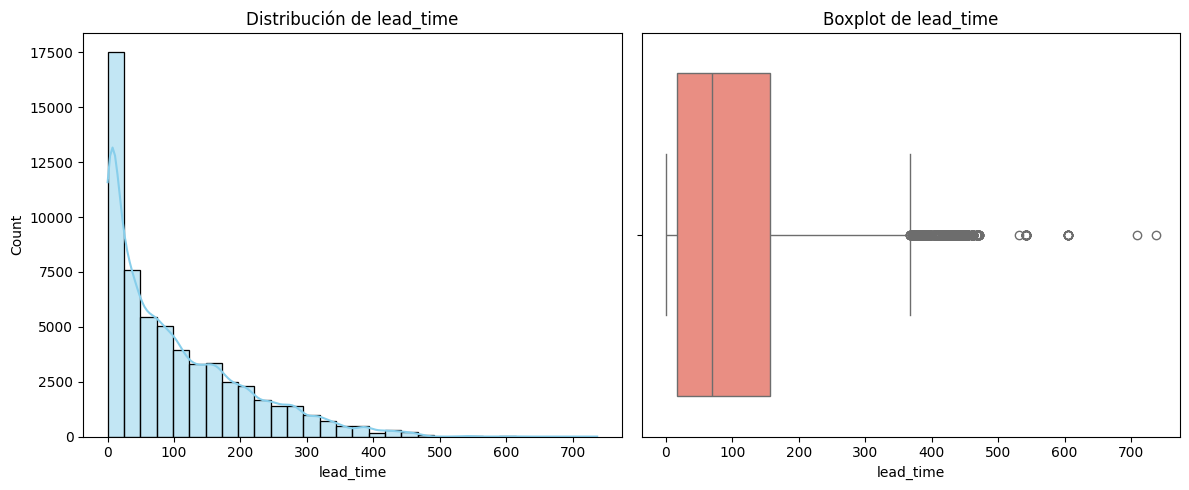

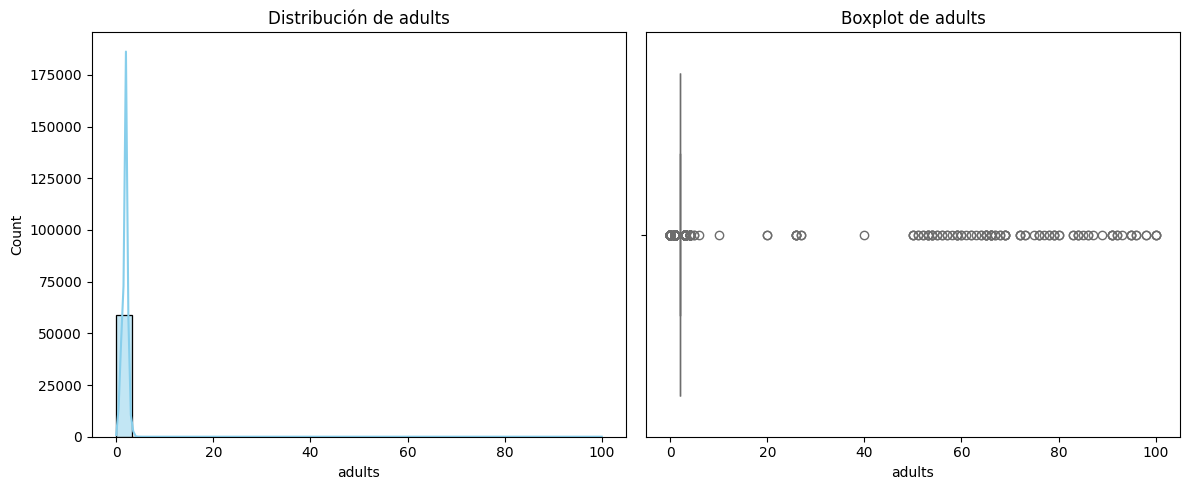

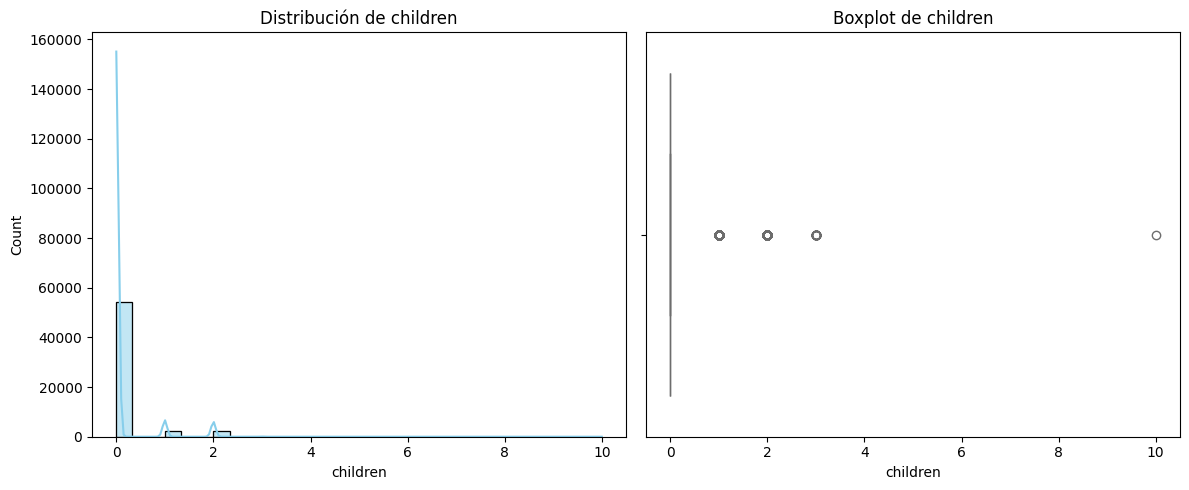

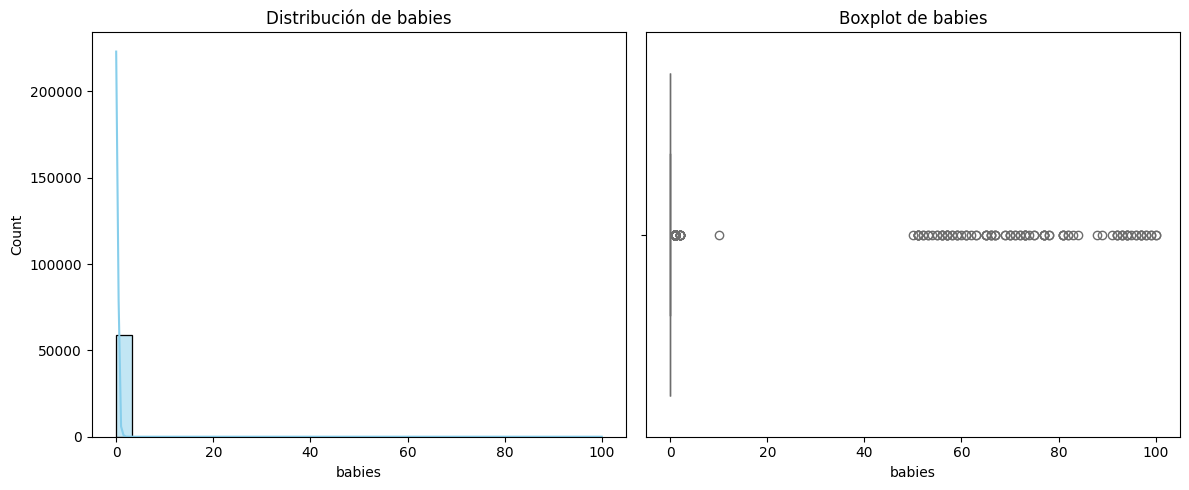

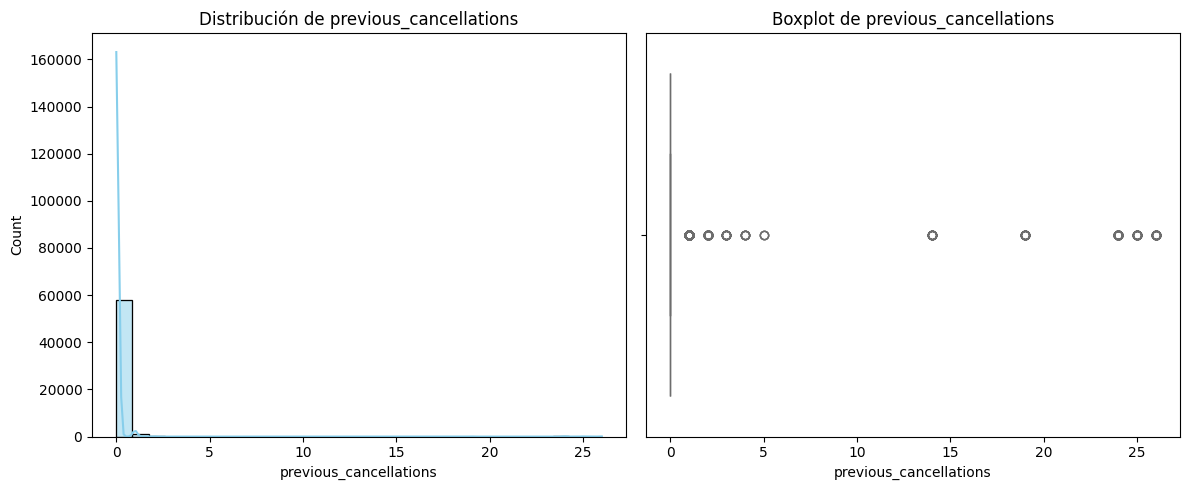

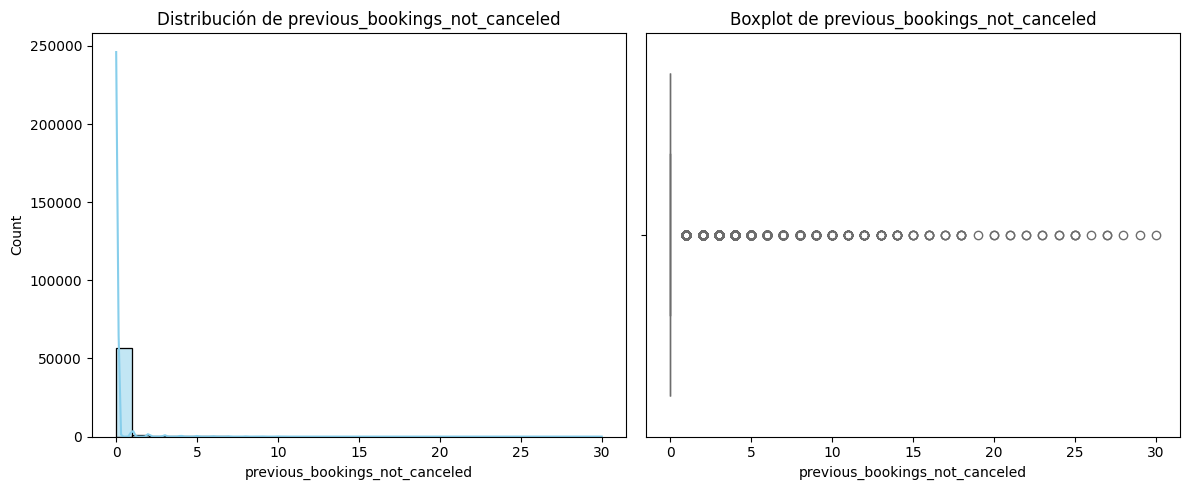

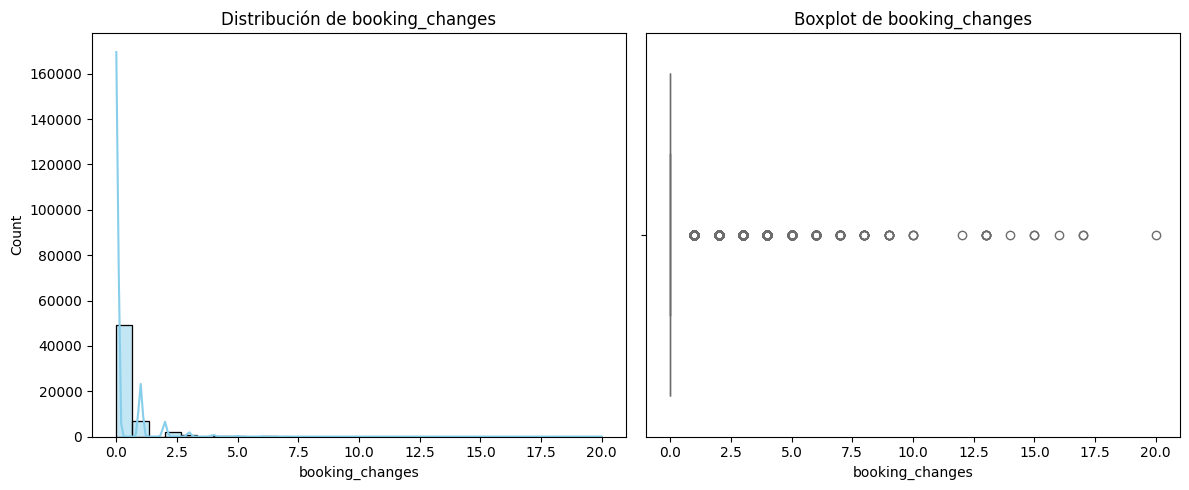

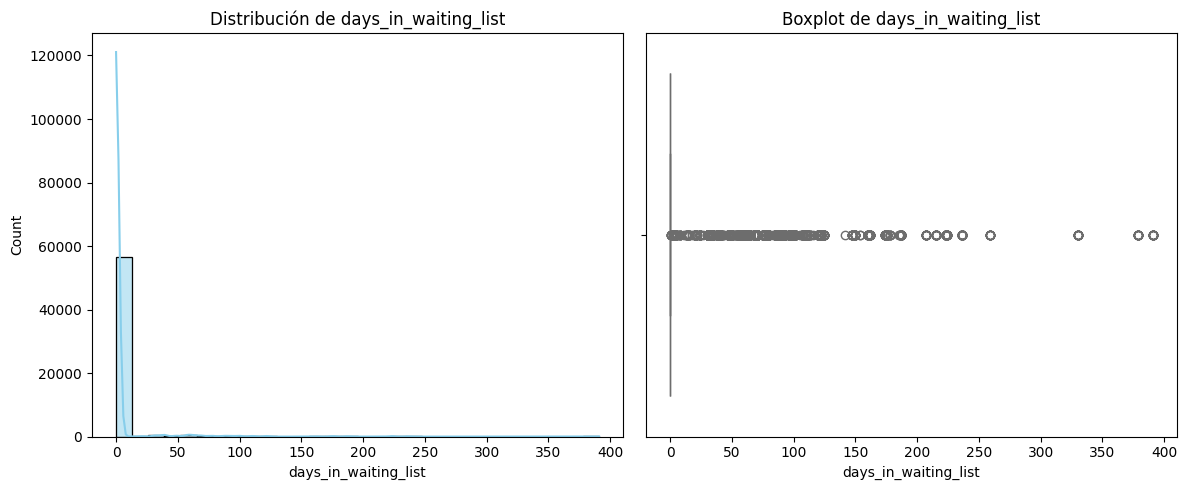

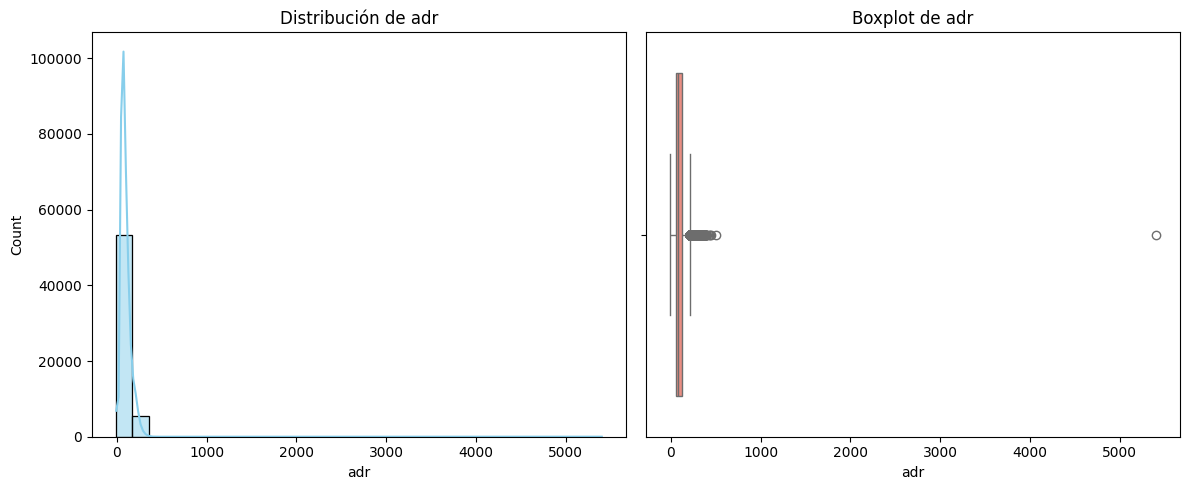

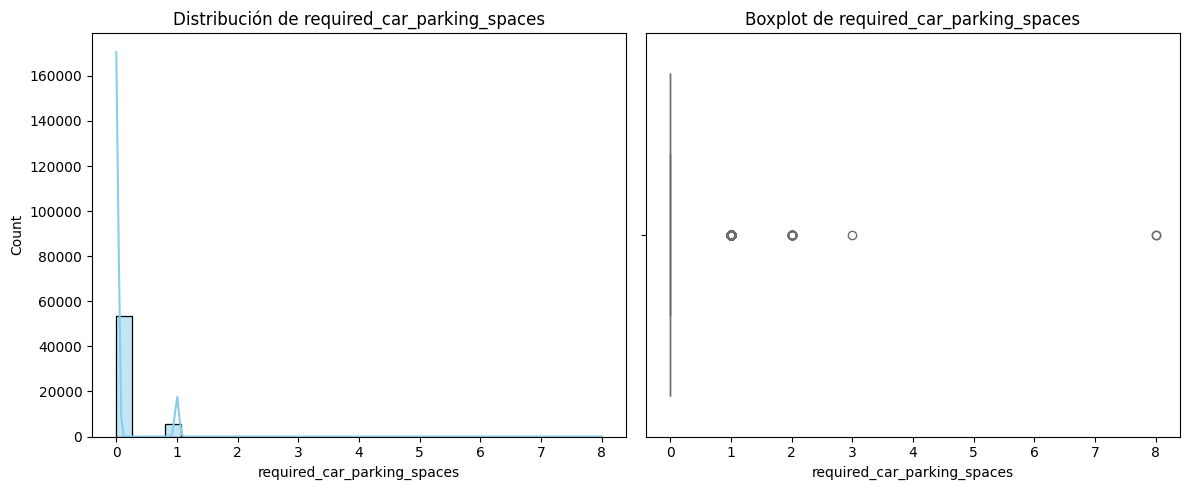

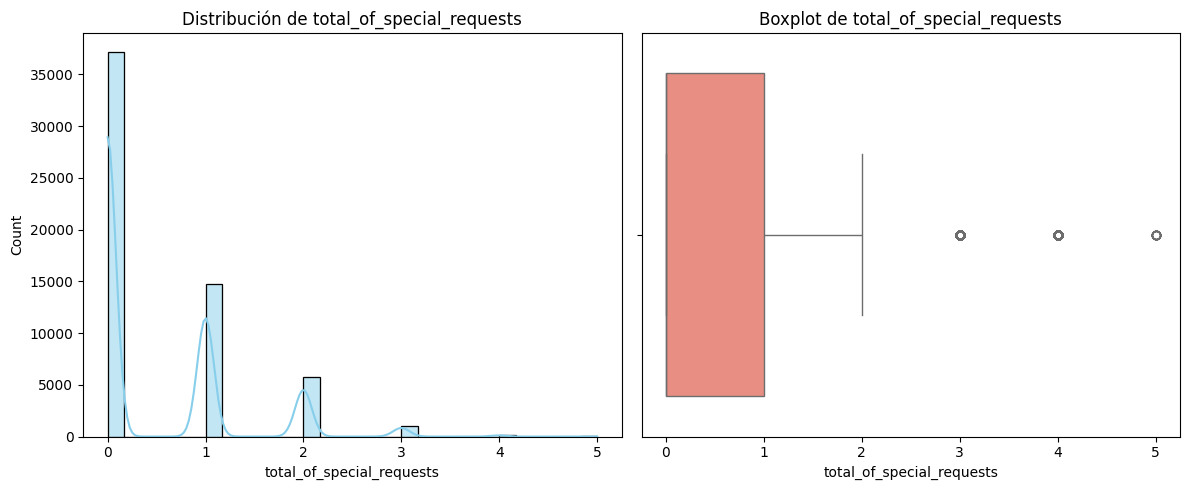

In [ ]:
for var in var_num:
    plt.figure(figsize=(12,5))
    
    # Histograma con curva KDE
    plt.subplot(1,2,1)
    sns.histplot(df_Hoteles[var], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribución de {var}")
    
    # Boxplot para ver outliers y dispersión
    plt.subplot(1,2,2)
    sns.boxplot(x=df_Hoteles[var], color="salmon")
    plt.title(f"Boxplot de {var}")
    
    plt.tight_layout()
    plt.show()

Al hacer el análisis univariado podemos ver que existen varios outliers que pueden afectar el análisis. En el momento no sabemos si estos outliers por ejemplo en la variable lead_time, son reales o no. Al no tener comunicación con el cliente, decidimos filtrar los datos típicos dejando por fuera los valores en la variable "babies" que sean iguales o superiores a 50 y eliminar los adr mayores a 5000, y así realizar nuevamente el análisis univariado. Valores como reservaciones con 100 bebés, o adr de 5000 son definitivamente atípicos y sin una cuidadosa charla con el cliente es mejor dejarlos por fuera del análisis.

Para el negocio no tendría sentido tener reservas con cero adultos, por lo que esos registros también los eliminamos para el análisis.

In [ ]:
outliers_adr = df_Hoteles[df_Hoteles["babies"] >= 80]
outliers_adr.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num
2209,Resort Hotel,True,74,2015,October,41,5,3,6,2,0,82,HB,PRT,Online TA,TA/TO,False,0,0,A,A,0,No Deposit,240.0,,0,Transient,86.00,0,2,Canceled,2015-08-11,10
5179,Resort Hotel,True,96,2016,April,17,19,2,5,2,0,89,HB,PRT,Groups,Direct,False,0,0,D,D,0,No Refund,273.0,,0,Transient,50.85,0,0,Canceled,2016-03-18,4
7593,Resort Hotel,True,119,2016,August,34,15,3,6,2,0,97,HB,GBR,Online TA,TA/TO,False,0,0,E,E,0,No Deposit,240.0,,0,Transient-Party,246.00,0,0,Canceled,2016-04-22,8
10888,Resort Hotel,True,124,2017,April,15,9,2,5,2,0,94,HB,PRT,Groups,TA/TO,False,0,0,A,C,1,No Refund,492.0,,0,Transient,80.00,0,0,Canceled,2017-02-28,4
11285,Resort Hotel,True,105,2017,April,18,30,2,5,2,2,81,BB,IRL,Online TA,TA/TO,False,0,0,G,G,0,No Deposit,240.0,,0,Transient,155.00,0,0,Canceled,2017-01-15,4
11615,Resort Hotel,True,60,2017,May,21,21,2,0,1,0,95,BB,PRT,Corporate,Corporate,False,0,0,A,A,0,No Deposit,,169.0,0,Transient-Party,50.00,0,0,Canceled,2017-05-17,5
14275,Resort Hotel,False,75,2015,August,34,22,2,5,3,0,96,BB,PRT,Direct,Direct,False,0,0,D,D,2,No Deposit,,,0,Transient,175.00,0,0,Check-Out,2015-08-29,8
14434,Resort Hotel,False,0,2017,February,6,11,0,0,2,0,98,BB,PRT,Direct,Direct,False,0,0,A,D,1,No Deposit,,,0,Transient,0.00,0,0,Check-Out,2017-02-11,2
14470,Resort Hotel,False,12,2017,April,14,8,0,1,2,0,94,BB,PRT,Online TA,TA/TO,False,0,2,A,A,0,No Deposit,242.0,,0,Transient,85.00,0,3,Check-Out,2017-04-09,4
17966,Resort Hotel,False,0,2015,December,52,22,0,1,1,0,97,BB,PRT,Corporate,Corporate,True,0,2,A,A,0,No Deposit,,47.0,0,Transient,35.00,0,0,Check-Out,2015-12-23,12


In [ ]:
p99_adr = df_Hoteles["adults"].quantile(0.001)
outliers_adr = df_Hoteles[df_Hoteles["adults"] >= p99_adr]
outliers_adr.sort_values(by="adults", ascending=True).head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_num
9376,Resort Hotel,True,0,2016,November,48,21,0,0,0,0,0,SC,NaN,Offline TA/TO,TA/TO,False,0,0,P,P,0,No Deposit,,386.0,0,Group,0.0,0,0,Canceled,2016-11-21,11
31765,Resort Hotel,False,31,2016,December,53,27,2,8,0,0,0,BB,PRT,Direct,Direct,False,0,0,D,D,3,No Deposit,,,0,Transient,28.0,1,0,Check-Out,2017-01-06,12
32029,Resort Hotel,False,4,2017,January,2,14,0,1,0,0,0,SC,PRT,Groups,TA/TO,False,0,0,A,G,0,No Deposit,168.0,,0,Transient-Party,0.0,0,0,Check-Out,2017-01-15,1
32827,Resort Hotel,False,46,2017,January,4,25,3,9,0,0,0,SC,FRA,Direct,Direct,False,0,0,A,I,8,No Deposit,,,0,Transient,0.0,0,0,Check-Out,2017-02-06,1
34849,Resort Hotel,False,15,2017,March,13,30,2,6,0,0,0,SC,PRT,Corporate,Corporate,False,0,0,A,A,0,No Deposit,,523.0,0,Transient-Party,0.0,0,0,NaN,2017-04-07,3
34855,Resort Hotel,False,15,2017,March,13,30,2,6,0,0,0,SC,PRT,Corporate,Corporate,False,0,0,A,A,0,No Deposit,,523.0,0,Transient-Party,0.0,0,0,Check-Out,2017-04-07,3
37459,Resort Hotel,False,1,2017,June,25,18,2,5,0,0,0,BB,GBR,Direct,Direct,False,0,0,A,I,6,No Deposit,,,0,Transient,0.0,0,0,Check-Out,2017-06-25,6
4127,Resort Hotel,True,0,2016,February,8,15,0,0,0,0,0,SC,NaN,Offline TA/TO,TA/TO,False,0,0,P,P,0,No Deposit,,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15,2
40392,City Hotel,False,132,2015,July,30,23,2,5,0,0,0,HB,PRT,Groups,TA/TO,False,0,0,A,A,4,No Deposit,1.0,,0,Transient-Party,0.0,0,0,Check-Out,2015-07-30,7
41048,City Hotel,False,104,2015,August,33,11,0,3,0,2,0,BB,FRA,Online TA,TA/TO,False,0,0,B,B,1,No Deposit,7.0,,0,Transient-Party,6.0,0,2,Check-Out,2015-08-14,8


In [ ]:
#df_hoteles_trimmed = df_Hoteles.copy()

df_hoteles_trimmed = df_hoteles_trimmed[df_hoteles_trimmed["babies"] < 50]
df_hoteles_trimmed = df_hoteles_trimmed[df_hoteles_trimmed["adr"] < 5000]
df_hoteles_trimmed = df_hoteles_trimmed[df_hoteles_trimmed["adults"] > 0]

df_hoteles_trimmed.shape

(58686, 34)

In [ ]:
df_hoteles_trimmed.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date_month_num,total_nights
count,58686.000000,58686.0,58686.000000,58686.000000,58686.000000,58686.000000,58686.000000,58686.0,58686.000000,58686.000000,58686.000000,58686.000000,58686.0,58686.000000,58686.0,58686.0,58686,58686.000000,58686.000000
mean,100.071874,2015.974577,27.841018,15.765873,1.057884,2.847715,1.976127,0.11064,0.012183,0.069420,0.099888,0.242017,3.529343,96.229904,0.0959,0.512337,2016-05-30 02:03:32.738983936,6.691562,3.905599
min,0.000000,2015.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,-6.380000,0.0,0.0,2014-11-18 00:00:00,1.000000,0.000000
25%,17.000000,2016.0,17.000000,8.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,60.000000,0.0,0.0,2015-11-29 00:00:00,4.000000,2.000000
50%,69.000000,2016.0,29.000000,16.000000,1.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,84.000000,0.0,0.0,2016-04-29 00:00:00,7.000000,3.000000
75%,157.000000,2016.0,38.000000,23.000000,2.000000,4.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,120.000000,0.0,1.0,2016-11-10 00:00:00,9.000000,5.000000
max,737.000000,2017.0,53.000000,31.000000,19.000000,50.000000,100.000000,10.0,10.000000,26.000000,30.000000,17.000000,391.0,508.000000,8.0,5.0,2017-09-14 00:00:00,12.000000,69.000000
std,101.170781,0.687602,13.345331,8.782806,1.092847,2.235294,2.945194,0.414499,0.117795,1.104085,0.830537,0.688662,21.847981,54.303881,0.299221,0.768718,NaN,3.045904,3.053266


Con la eliminación de los datos outliers que se consideraron datos que no reflejan condiciones del negocio, se procede a graficar nuevamente.

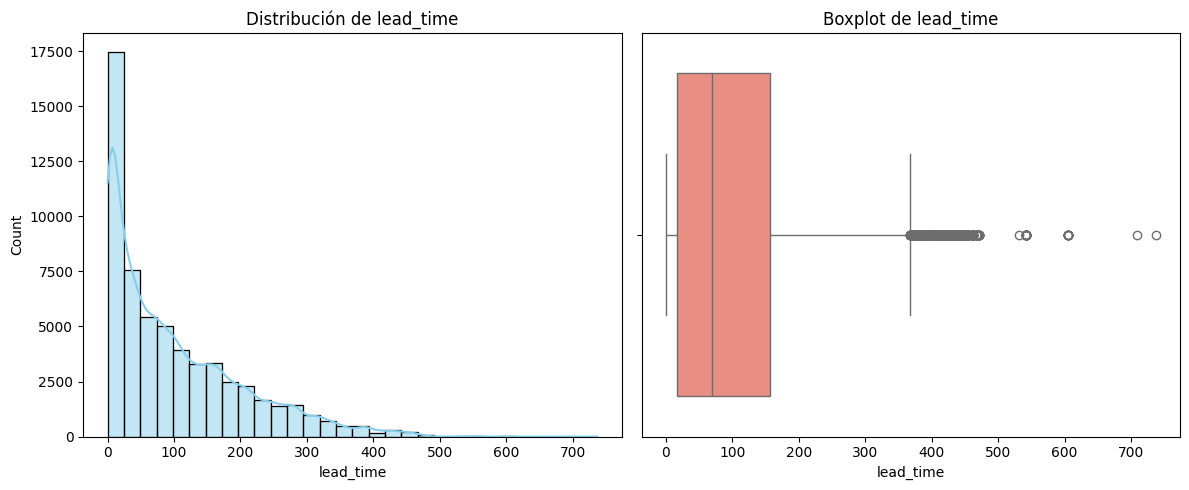

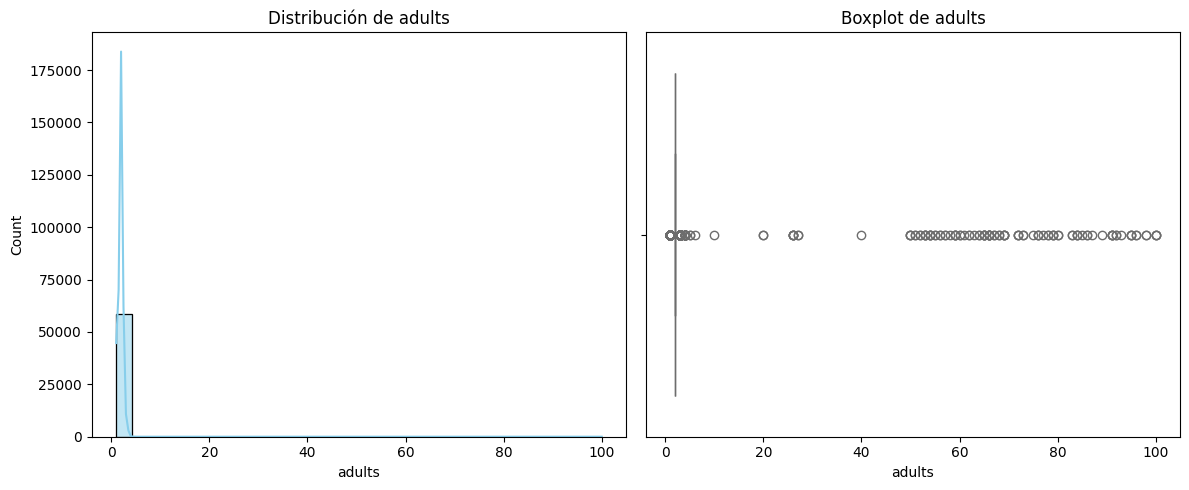

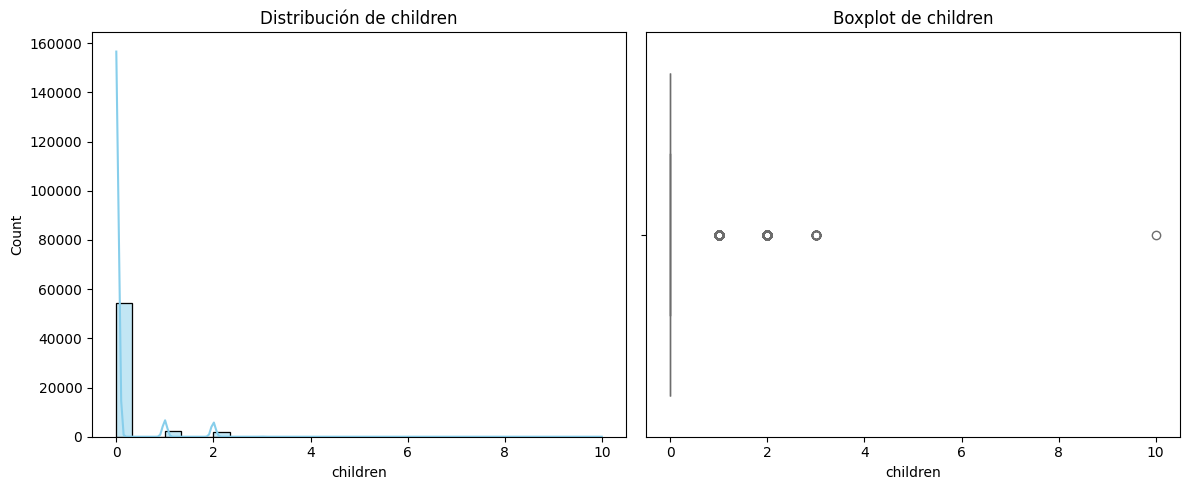

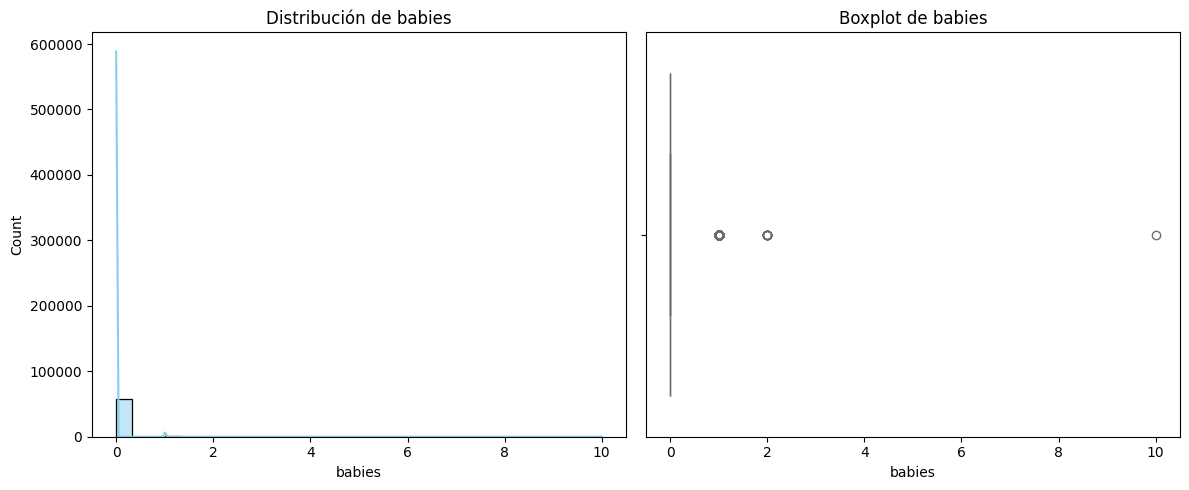

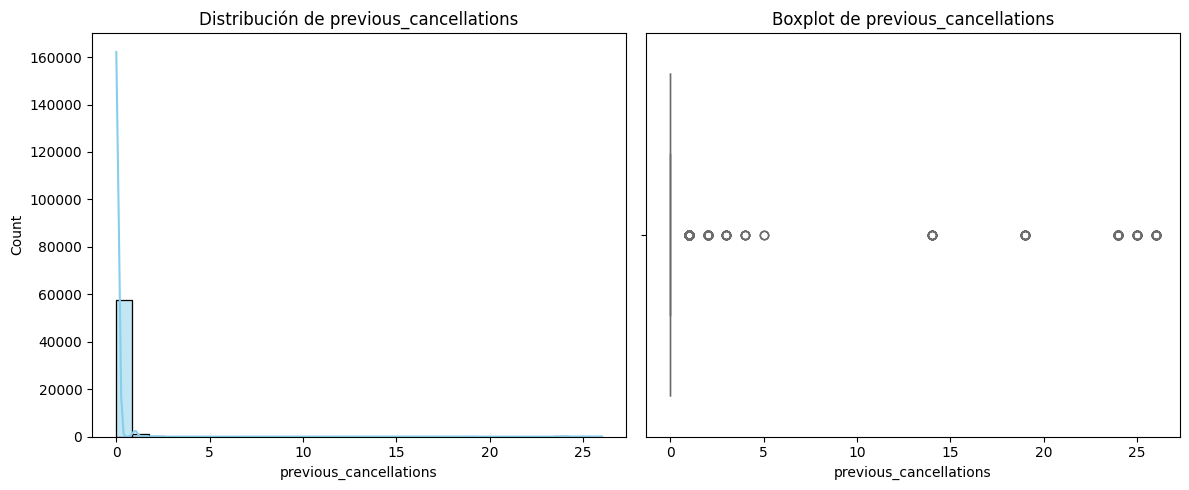

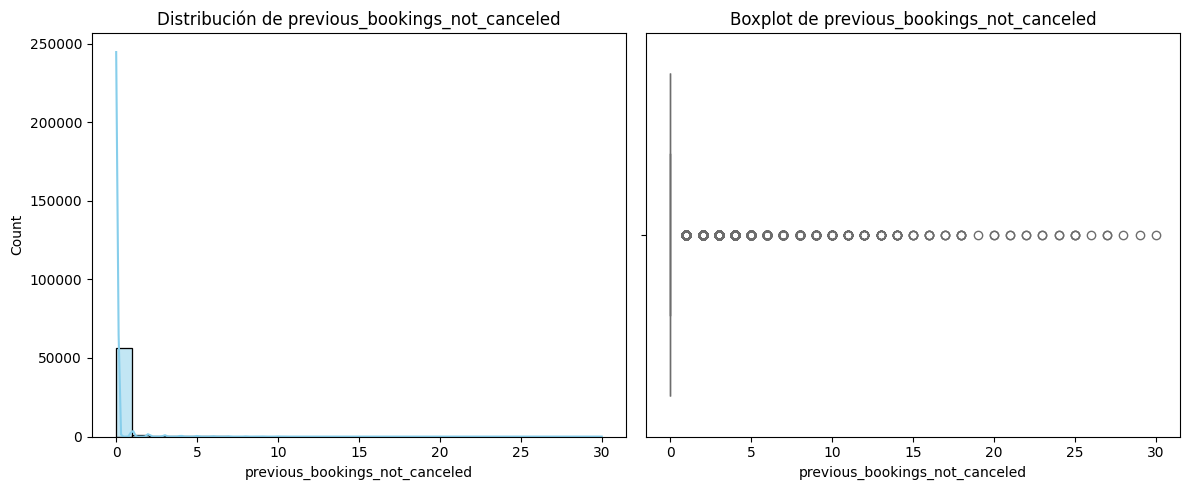

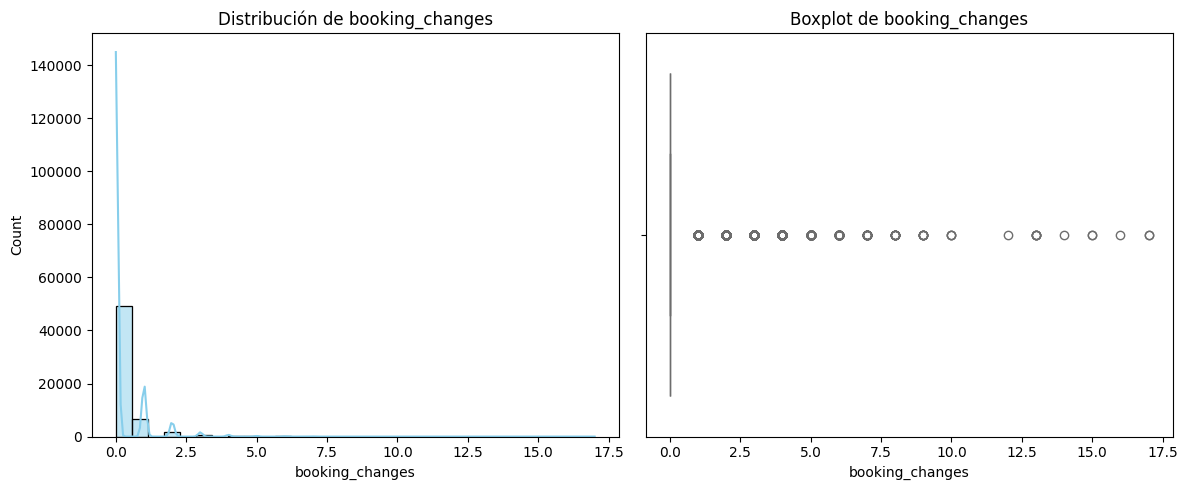

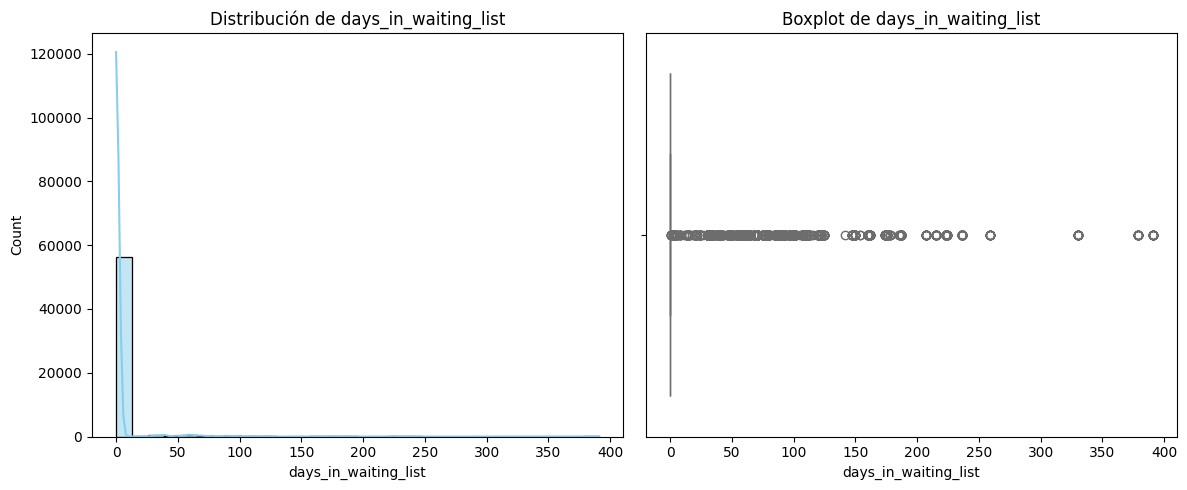

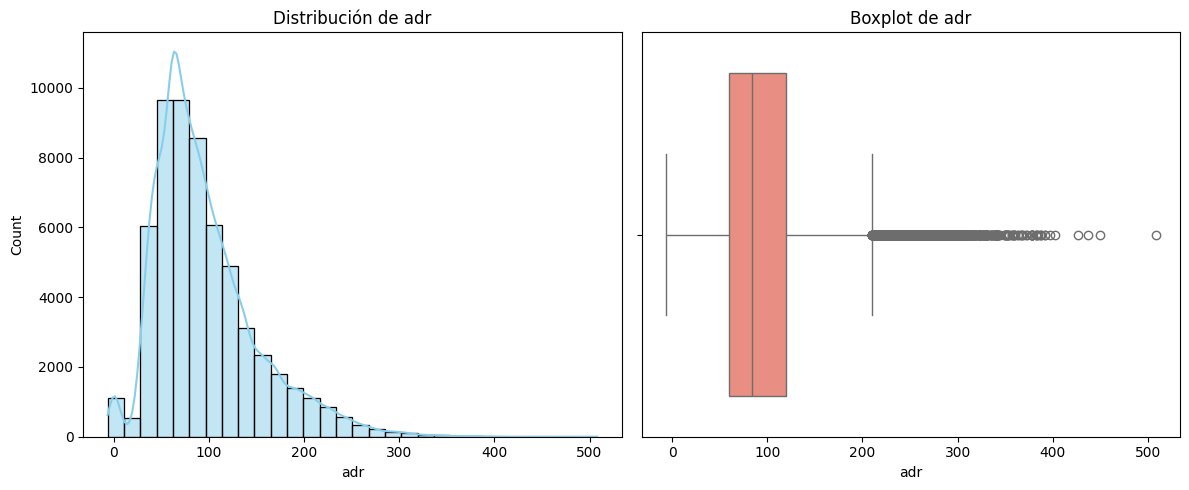

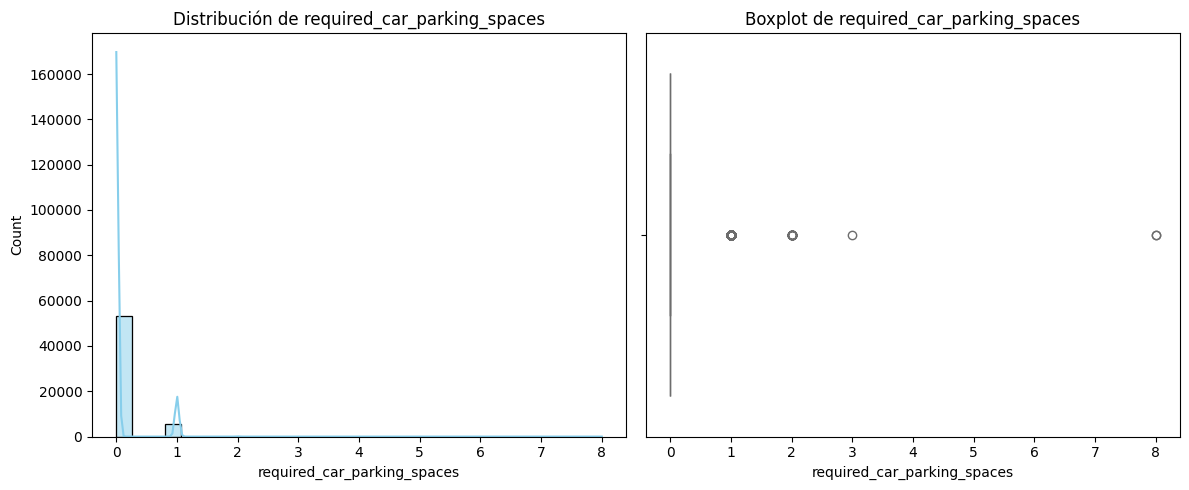

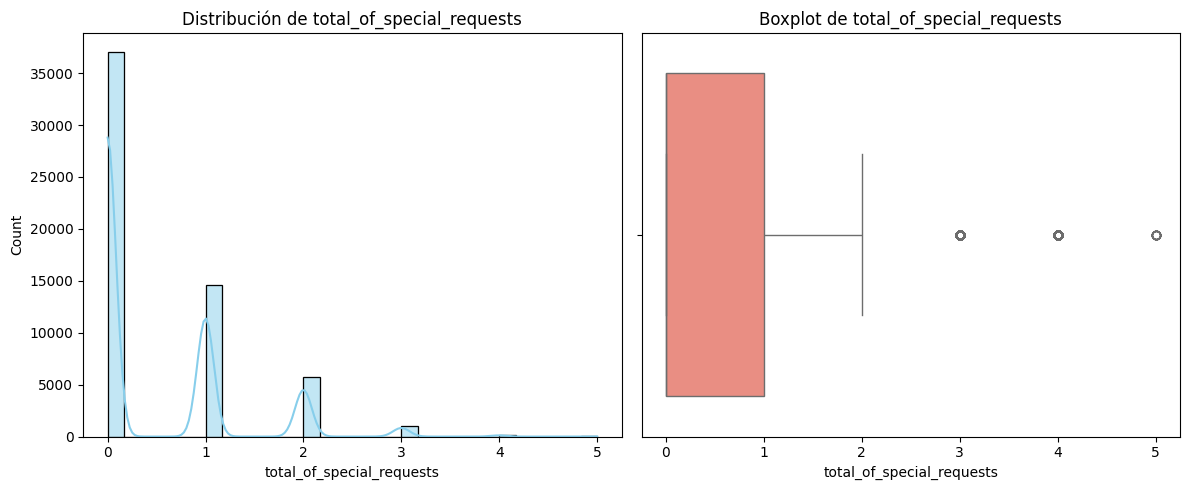

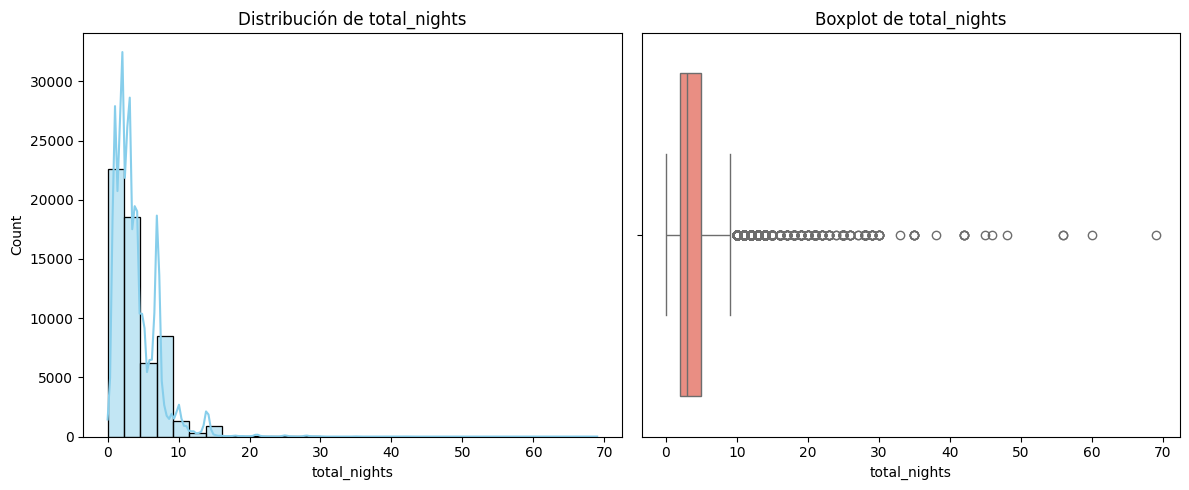

In [ ]:
for var in var_num:
    plt.figure(figsize=(12,5))
    
    # Histograma con curva KDE
    plt.subplot(1,2,1)
    sns.histplot(df_hoteles_trimmed[var], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribución de {var}")
    
    # Boxplot para ver outliers y dispersión
    plt.subplot(1,2,2)
    sns.boxplot(x=df_hoteles_trimmed[var], color="salmon")
    plt.title(f"Boxplot de {var}")
    
    plt.tight_layout()
    plt.show()

Una vez hechas las gráficas de las variables numéricas, continuamos con las categorícas.

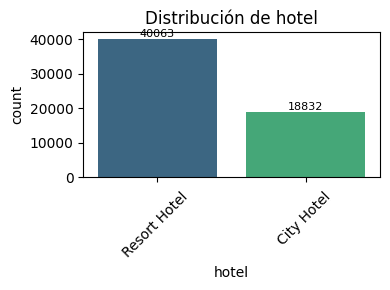

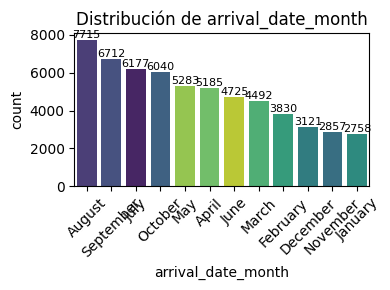

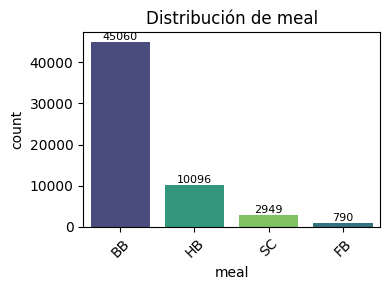

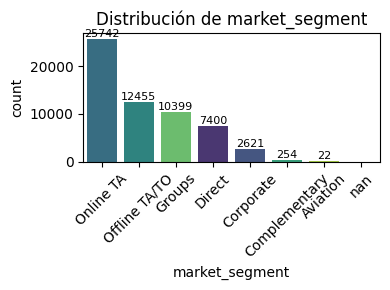

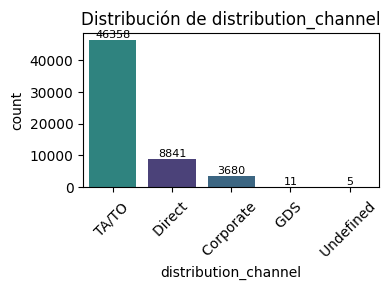

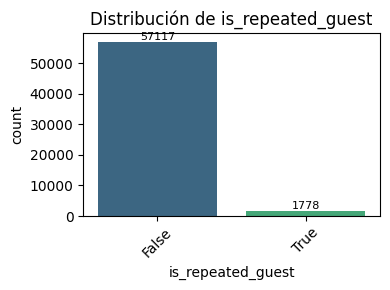

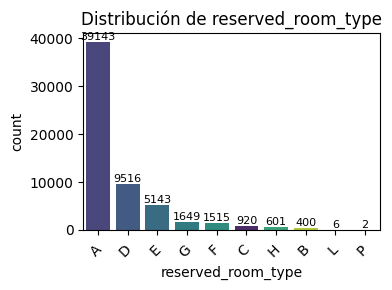

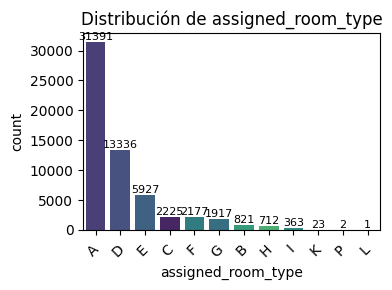

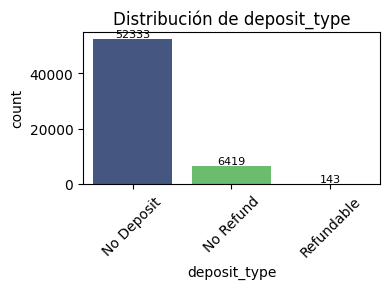

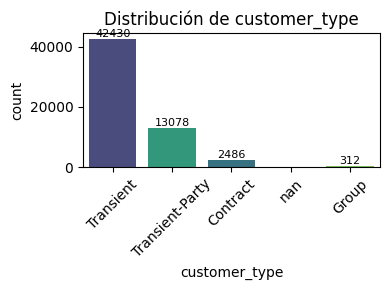

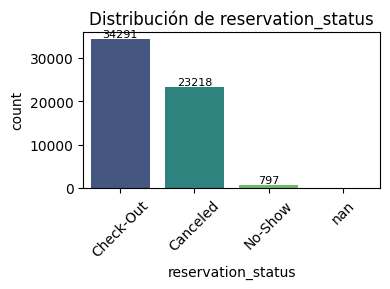

In [ ]:
for var in var_cat: 
    plt.figure(figsize=(4,3)) 
    order = df_Hoteles[var].value_counts(dropna=False).index 
    
    # Gráfico con colores distintos por categoría
    ax = sns.countplot(data=df_Hoteles, x=var, order=order, palette="viridis", hue=var, legend=False) 
    
    # Añadir valores de frecuencia sobre cada barra
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2,       # posición X centrada
                p.get_height() + 0.5,              # un poco arriba de la barra
                int(p.get_height()),               # el valor de frecuencia
                ha="center", va="bottom", fontsize=8)
    
    plt.title(f"Distribución de {var}") 
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

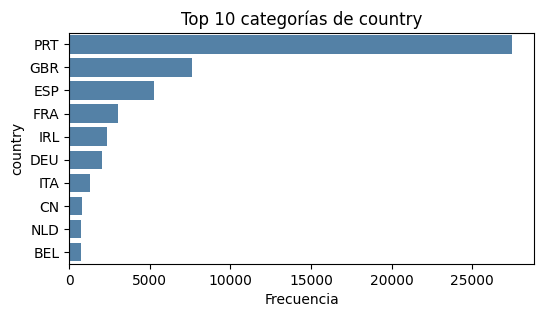

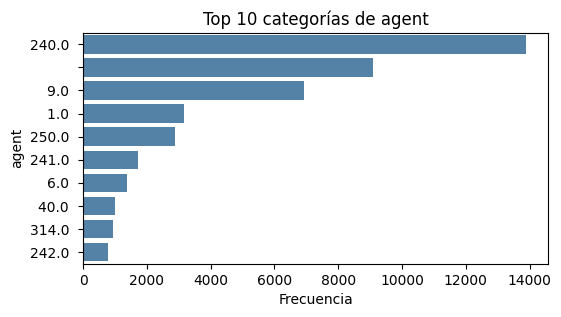

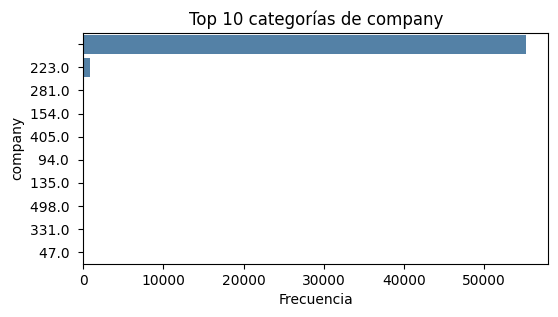

In [ ]:
top_n = 10

for var in var_cat_2:
    plt.figure(figsize=(6,3))
    
    # Obtener Top N categorías (incluyendo nulos como "Desconocido")
    counts = df_hoteles_trimmed[var].fillna("NAN").value_counts().nlargest(top_n)
    
    # Graficar
    sns.barplot(x=counts.values, y=counts.index, color="steelblue")
    
    plt.title(f"Top {top_n} categorías de {var}")
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.show()

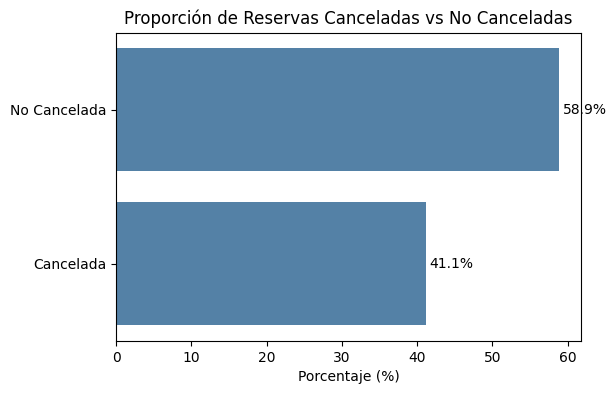

In [ ]:
counts = df_hoteles_trimmed["is_canceled"].value_counts(normalize=True) * 100
counts.index = counts.index.map({False: "No Cancelada", True: "Cancelada"})

# Gráfico de barras horizontales
plt.figure(figsize=(6,4))
sns.barplot(x=counts.values, y=counts.index, color="steelblue")  
plt.title("Proporción de Reservas Canceladas vs No Canceladas")
plt.xlabel("Porcentaje (%)")
plt.ylabel("")

# Anotar valores
for i, v in enumerate(counts.values):
    plt.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.show()

### Conclusiones del Análisis Univariado.

El set de datos muestra información de las reservas de diferentes hoteles en un periodo de tiempo entre 2015 y 2017. Aproximadamente el 41% de dichas reservas fueron canceladas y este número puede ser preocupante para la cadena de hoteles puesto que la mayoría de las reservas (88.8%) no han dejado ningún depósito y el manejo de estas cancelaciones se puede volver problemático para la cadena de hoteles.

En su mayoría las reservaciones vienen de Portugal, por lo que se asume que los datos dados son de hoteles de ese país, son huéspedes que en su mayoría no vienen en representación de una empresa, que viajan en los meses de verano y los cercanos al verano y con una disminución considerable en los meses de invierno. El 68% de los huéspedes prefirieron un hotel tipo resort y el restante un hotel de ciudad. Finalmente se evidencia que un gran porcentaje de huéspedes viajaron a través del agente de código 240. No se tienen datos de los agentes pero vale la pena resaltar que los viajes registrados con dicho agente 240 superan con creces los viajes registrados con otros agentes e incluso los que no tienen agente registrado.

### ESTRATEGIA DE ANÁLISIS

Dentro del análisis descrito queremos encontrar patrones que nos den indicios sobre los factores que más influyen en la tasa de cancelaciones.

Inicialmente vamos a seleccionar las cinco variables que se visualizan con una mayor tendencia a aftectar las cancelaciones. Precisamente comenzaremos graficando cada una de las variables, partiendo de las categorícas y comparándolas VS la tasa de cancelaciones. Luego vamos a seleccionar las variables numéricas que afecten las cancelaciones. Para hacer esta selección nos enfocaremos en un análisis visual de correlación a través de un mapa de calor y luego profundizaremos con tablas de contingencia en caso de quedar dudas sore las variables a estudiar. Escogidas las cinco variables, vamos a plantear la hipótesis de que cada una de estas variables influye sobre la tasa de cancelaciones y dependiendo del tipo de variable y su distribución haremos pruebas de hipótesis para validarla o descartarla.

Es importante destacar que algunas de las variables se dejan intencionalmente por fuera de este análisis: variables de estado de reserva, que no influyen en la variable objetivo sino que son simplemente una medida de los datos posterior a la reserva. Variables de fecha de granularidad año y día, porque se presume que estacionalidad entre los años es similar y que las cancelaciones vistas desde el día del año no aportarían al análisis. Terminada esta evaluación podremos presentar los resultados a los stakeholders para tomar decisiones sobre los pasos a seguir.

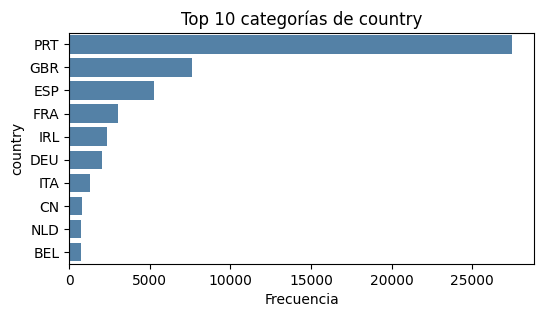

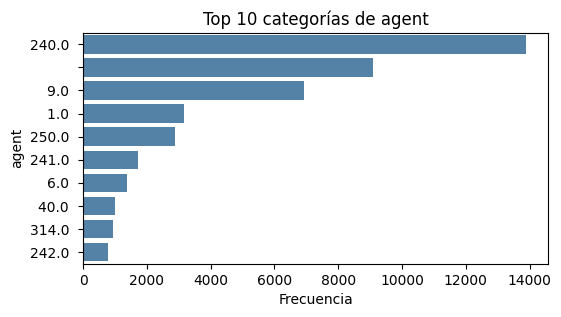

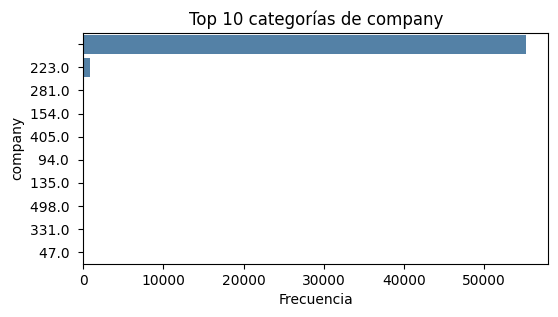

In [ ]:
top_n = 10

for var in var_cat_2:
    plt.figure(figsize=(6,3))
    
    # Obtener Top N categorías (incluyendo nulos como "Desconocido")
    counts = df_hoteles_trimmed[var].fillna("NAN").value_counts().nlargest(top_n)
    
    # Graficar
    sns.barplot(x=counts.values, y=counts.index, color="steelblue")
    
    plt.title(f"Top {top_n} categorías de {var}")
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.show()

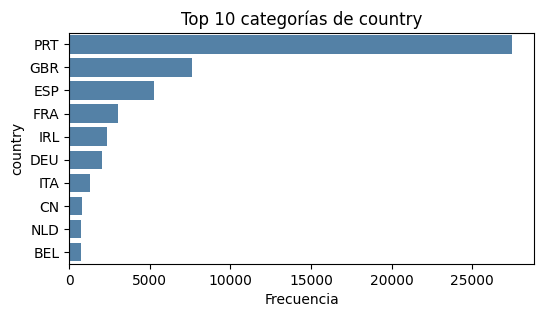

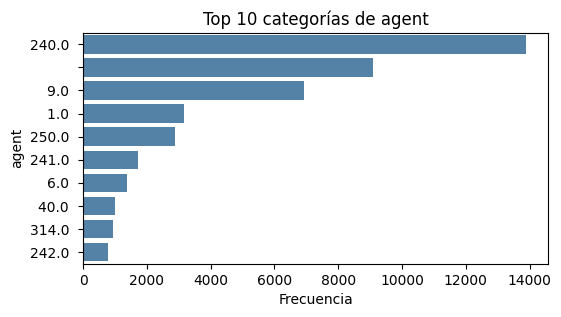

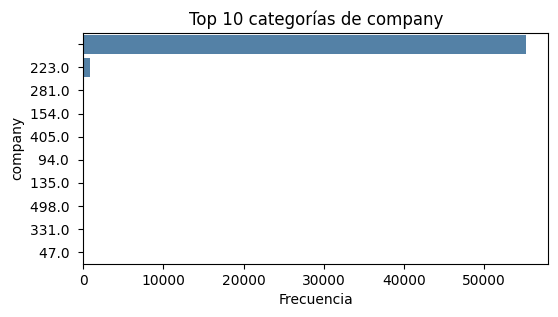

In [ ]:
top_n = 10

for var in var_cat_2:
    plt.figure(figsize=(6,3))
    
    # Obtener Top N categorías (incluyendo nulos como "Desconocido")
    counts = df_hoteles_trimmed[var].fillna("NAN").value_counts().nlargest(top_n)
    
    # Graficar
    sns.barplot(x=counts.values, y=counts.index, color="steelblue")
    
    plt.title(f"Top {top_n} categorías de {var}")
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.show()

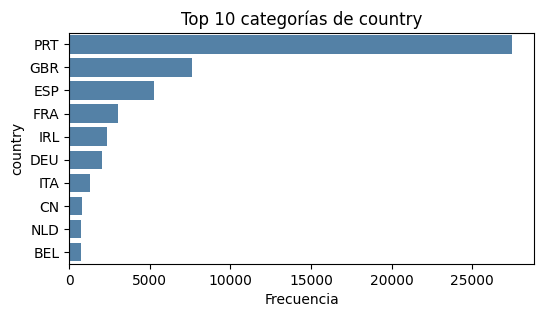

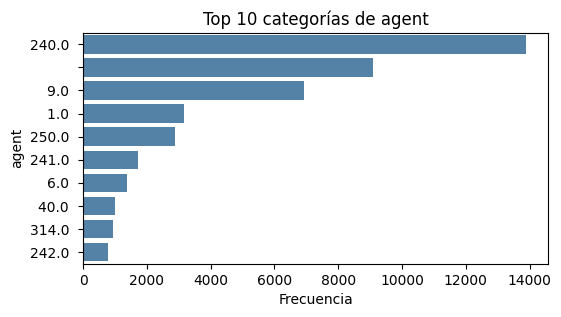

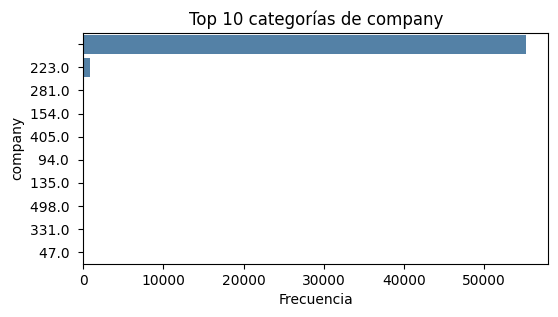

In [ ]:
top_n = 10

for var in var_cat_2:
    plt.figure(figsize=(6,3))
    
    # Obtener Top N categorías (incluyendo nulos como "Desconocido")
    counts = df_hoteles_trimmed[var].fillna("NAN").value_counts().nlargest(top_n)
    
    # Graficar
    sns.barplot(x=counts.values, y=counts.index, color="steelblue")
    
    plt.title(f"Top {top_n} categorías de {var}")
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.show()

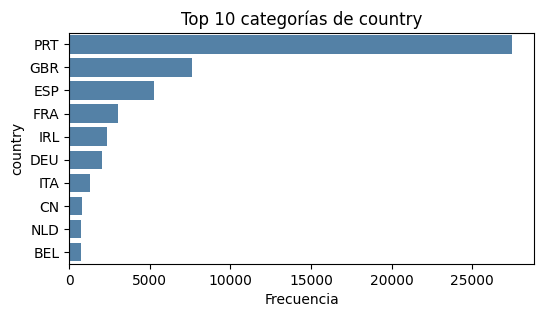

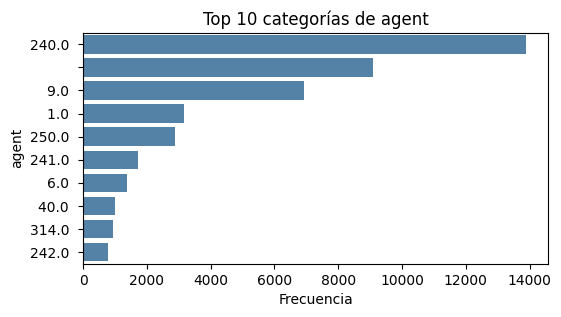

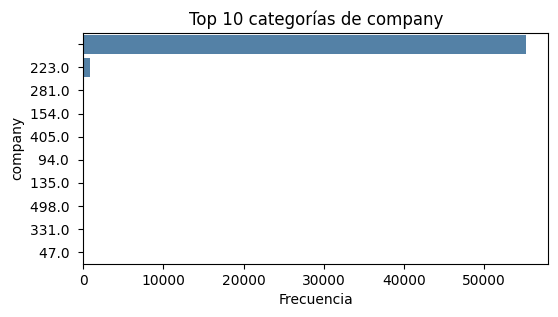

In [ ]:
top_n = 10

for var in var_cat_2:
    plt.figure(figsize=(6,3))
    
    # Obtener Top N categorías (incluyendo nulos como "Desconocido")
    counts = df_hoteles_trimmed[var].fillna("NAN").value_counts().nlargest(top_n)
    
    # Graficar
    sns.barplot(x=counts.values, y=counts.index, color="steelblue")
    
    plt.title(f"Top {top_n} categorías de {var}")
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.show()

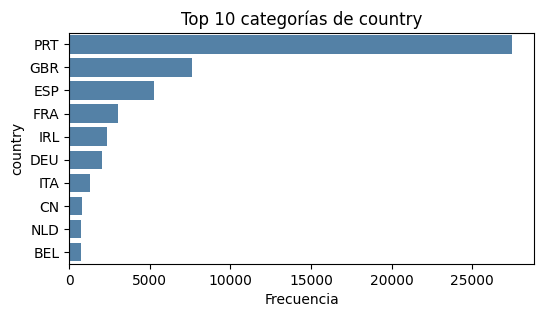

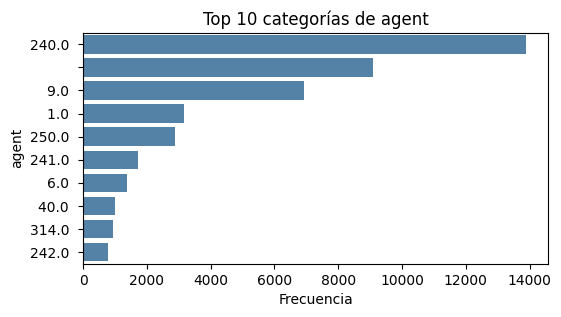

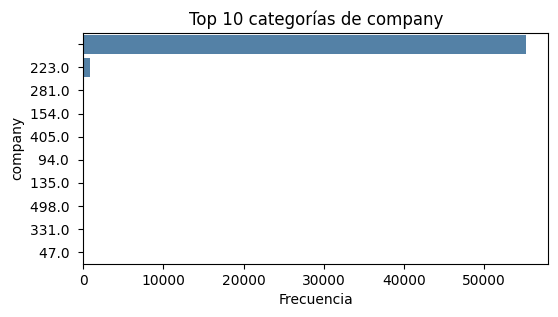

In [ ]:
top_n = 10

for var in var_cat_2:
    plt.figure(figsize=(6,3))
    
    # Obtener Top N categorías (incluyendo nulos como "Desconocido")
    counts = df_hoteles_trimmed[var].fillna("NAN").value_counts().nlargest(top_n)
    
    # Graficar
    sns.barplot(x=counts.values, y=counts.index, color="steelblue")
    
    plt.title(f"Top {top_n} categorías de {var}")
    plt.xlabel("Frecuencia")
    plt.ylabel(var)
    plt.show()

### DESARROLLO DE LA ESTRATEGIA

En el análisis visual podemos observar lo siguiente:
- En los hoteles de ciudad hay mayor número de cancelaciones que de reservas completadas satisfactoriamenete.
- Las frecuencias mensuales de llegada de reservas no canceladas y reservas canceladas difiere considerablemente y se ve que la tasa de cancelaciones comparada con la de no cancelaciones crece desde enero a junio y en junio incluso hay más cancelaciones que reservas no canceladas.
- El tipo de comida aunque no sigue una tendencia perfecta, no indica preliminarmente relación entre la comida y las cancelaciones exceptuando FB y SC, que son la minoría de casos. (SC incluye valores no definidos que se asume significan reservaciones incompletas)
- La tasa de cancelaciones es menor cuando la reserva se hace directamente, lo que es previsible y la tasa de cancelaciones sube cuando es hecha en grupos.
- Las cancelaciones por grupo de distribución aunque altas (como en toda la muestra) no evidencian algún parámetro obvio.
- Los huéspedes frecuentes cancelan menos como es de esperarse.
- El tipo de habitación reservada parece no infuir.
- El tipo de habitación asignada si influye. ¿Es posible que por factores de sobrecupo en las reservas se hayan bajado las categorías a los huéspedes?
- Es extraño que las reservas sin reembolso se hayan cancelado y en esa categoría prácticamente no hayan reservas completadas satisfactoriamente.
- Aunque hay diferencias en las proporciones de cancelaciones entre grupos, no se ven diferencias grandes.
- Las reservas hechas en Portugal tienden a cancelarse más que las de los demás países. Es de esperarse que en el país en donde opera la cadena hotelera hayan más cancelaciones que en los que los huéspedes han planificado más extensamente su viaje, pero merece la pena validar por qué hay tantas cancelaciones.
- Hay una agencia de viajes con una tasa muy grande de cancelaciones.
- Las correlaciones entre variables numéricas son bajas, pero destacan las solicitudes especiales y los espacios de parqueo que se puede asumir como una subcategoría de solicitudes especiales.

Después de este análisis preliminar seleccionamos las siguientes categorías para su análisis:
- hotel
- mes
- country
- agent
- special_requests

Gráficas de variables categoricas 1.

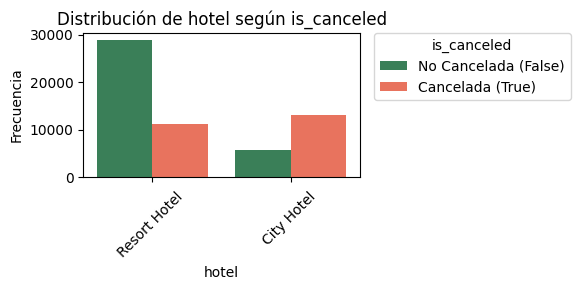

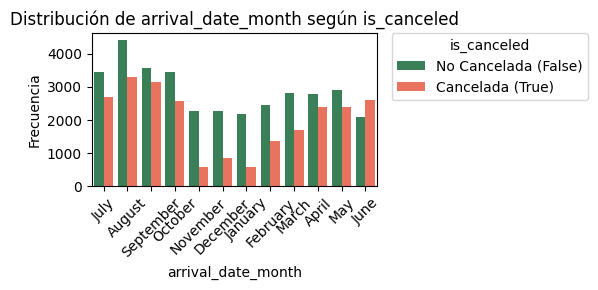

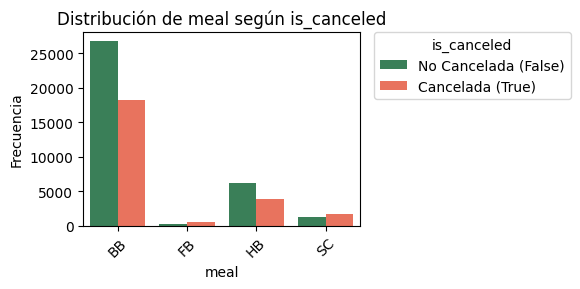

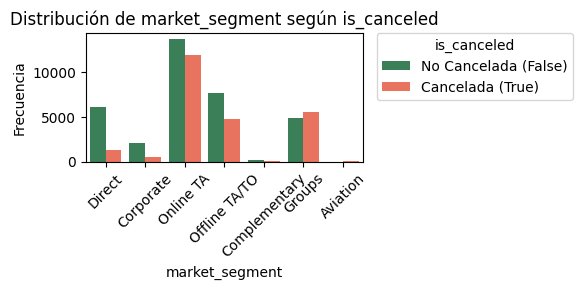

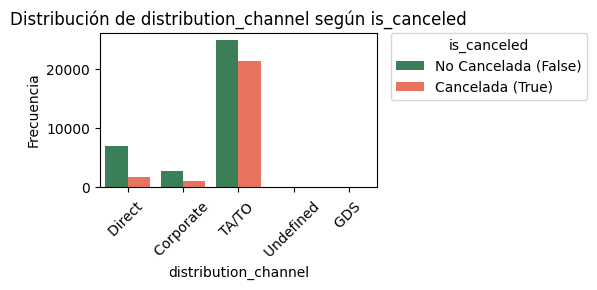

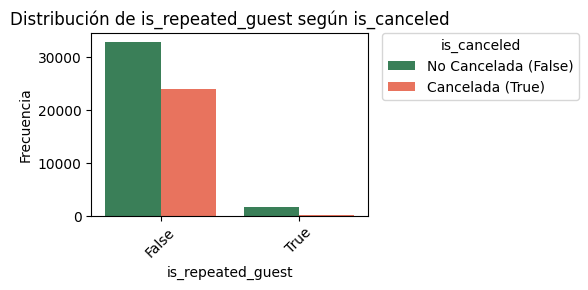

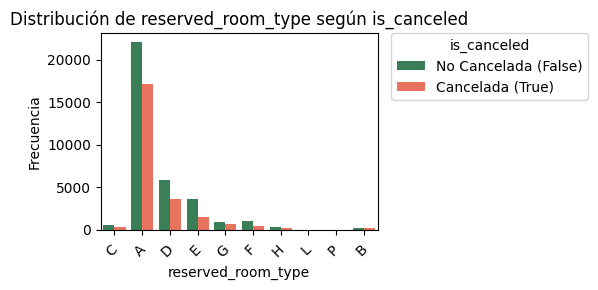

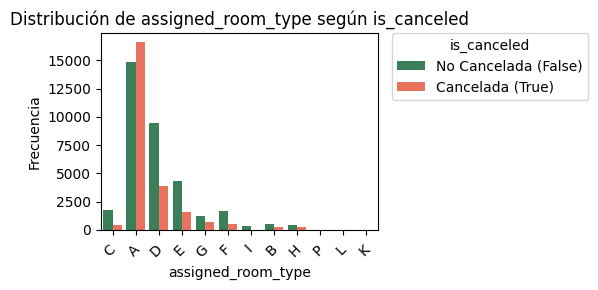

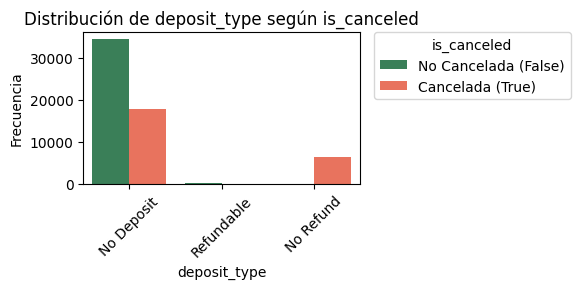

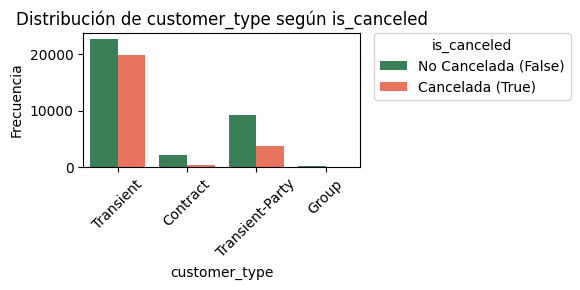

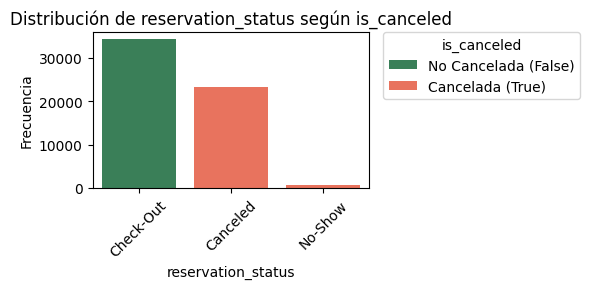

In [ ]:
for var in var_cat:
    plt.figure(figsize=(6,3))
    
    # Gráfico de barras agrupadas
    ax = sns.countplot(data=df_Hoteles, x=var, hue="is_canceled", palette=["seagreen", "tomato"])
    
    # Ajustar leyenda para boolean
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ["No Cancelada (False)", "Cancelada (True)"]
    # Leyenda a la derecha, fuera del gráfico
    plt.legend(handles, new_labels, title="is_canceled", 
               bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)
    
    plt.title(f"Distribución de {var} según is_canceled")
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


Con el objetivo de escoger dos de las 5 variables a estudiar, seleccionamos las dos variables que según los gráficos tienen mayor variabilidad entre sus categorías. La primera es el tipo de hotel y la segunda el mes del año para el que se reservó.

Vamos a explorar ahora las otras variables categoricas y las numéricas para escoger las 3 variables a estudiar profundamente.

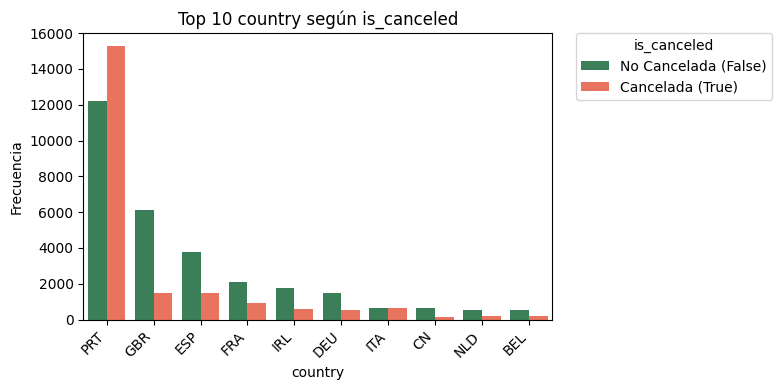

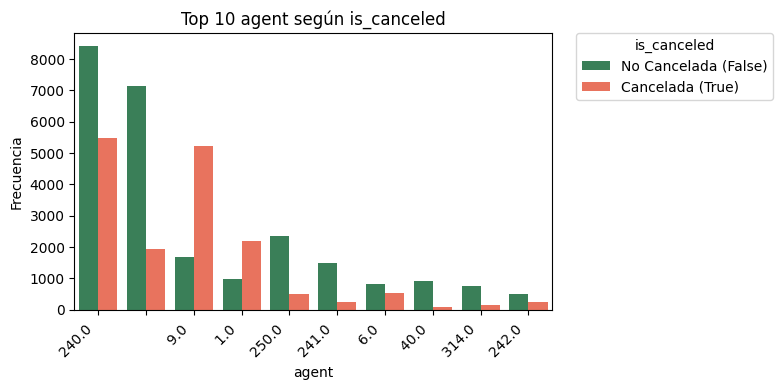

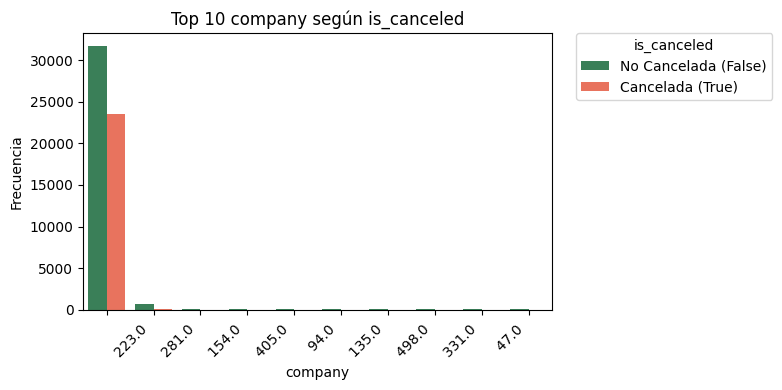

In [ ]:
target_col = "is_canceled"
top_n = 10

for var in var_cat_2:

    # Preparamos la columna 'country'
    s = df_hoteles_trimmed[var].astype("string").fillna("Desconocido")
    top_countries = s.value_counts().nlargest(top_n).index

    # Subconjunto del dataframe con solo los top países
    df_plot = df_hoteles_trimmed.copy()
    df_plot["country_tmp"] = s
    df_plot = df_plot[df_plot["country_tmp"].isin(top_countries)]

    # Gráfico de barras agrupadas
    plt.figure(figsize=(8,4))
    ax = sns.countplot(
        data=df_plot,
        x="country_tmp",
        hue=target_col,
        order=top_countries,
        palette=["seagreen", "tomato"]
    )

    # Leyenda fuera y con etiquetas legibles
    handles, labels = ax.get_legend_handles_labels()
    new_labels = ["No Cancelada (False)", "Cancelada (True)"]
    plt.legend(handles, new_labels, title=target_col,
            bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

    plt.title(f"Top {top_n} {var} según {target_col}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

Ahora vamos a graficar para ver qué variables numéricas están relacionadas con is_canceled y las incluiremos en nuestro análisis más profundo. Vamos a incluir una nueva columna de duración de estadía.

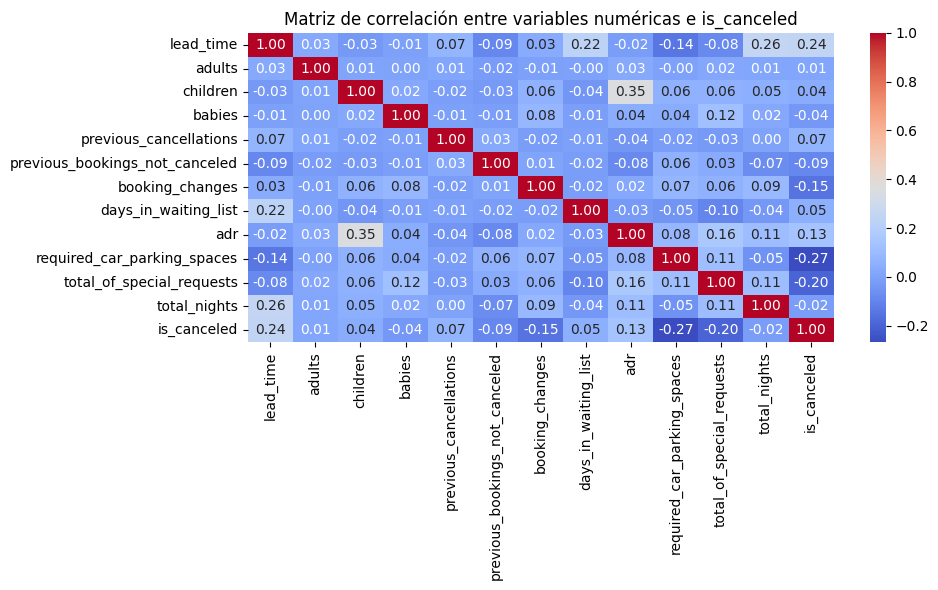

In [ ]:

target_col = "is_canceled"

# Subset solo numéricas + target
num_vars = var_num + [target_col]
df_num = df_hoteles_trimmed[num_vars]

# Calcular matriz de correlación (Pearson)
corr = df_num.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación entre variables numéricas e is_canceled")
plt.tight_layout()
plt.show()

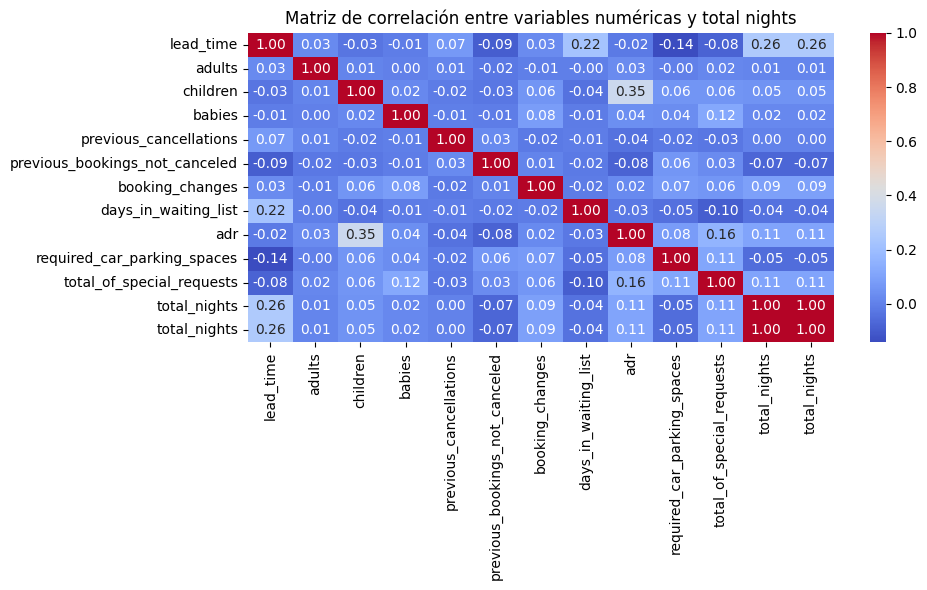

In [ ]:
target_col = "total_nights"

# Subset solo numéricas + target
num_vars = var_num + [target_col]
df_num = df_hoteles_trimmed[num_vars]

# Calcular matriz de correlación (Pearson)
corr = df_num.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matriz de correlación entre variables numéricas y total nights")
plt.tight_layout()
plt.show()

In [ ]:
corr_target = corr[[target_col]].sort_values(by=target_col, ascending=False)
print(corr_target)


                                is_canceled
is_canceled                        1.000000
lead_time                          0.244651
adr                                0.134231
previous_cancellations             0.068667
days_in_waiting_list               0.046508
children                           0.037710
adults                             0.011808
babies                            -0.036184
previous_bookings_not_canceled    -0.090148
booking_changes                   -0.150693
total_of_special_requests         -0.196534
required_car_parking_spaces       -0.267898


In [ ]:

target_col = "is_canceled"

var = "total_of_special_requests"

# Tabla de conteos
ct = pd.crosstab(df_hoteles_trimmed[var], df_hoteles_trimmed[target_col])

# Tasa de cancelación por categoría
ct_pct = pd.crosstab(df_hoteles_trimmed[var], df_hoteles_trimmed[target_col], normalize="index").round(3)

# Peso de cancelaciones: qué % de todas las cancelaciones vienen de esa categoría
cancel_counts = ct[True]  # reservas canceladas en cada categoría


# Unir todo en un solo DataFrame
contingency_table = ct.copy()
contingency_table["cancel_rate"] = ct_pct[True]           # proporción canceladas en cada categoría


print(contingency_table)


is_canceled                False   True  cancel_rate
total_of_special_requests                           
0                          18797  18235        0.492
1                          10570   4075        0.278
2                           4208   1574        0.272
3                            828    236        0.222
4                            132     17        0.114
5                             13      1        0.071


### Análisis a 5 variables seleccionadas

Variables categorícas - Chi2

In [ ]:
df_hoteles_trimmed.columns

In [ ]:
df_hoteles_grouped = df_hoteles_trimmed.copy()

freqs = df_hoteles_trimmed["country"].value_counts()
rare = freqs[freqs < 100].index
#return df[var].replace(rare, "Otros")
df_hoteles_grouped["country_grouped"] = df_hoteles_trimmed["country"].replace(rare, "otros")

freqs = df_hoteles_trimmed["agent"].value_counts()
rare = freqs[freqs < 190].index
#return df[var].replace(rare, "Otros")
df_hoteles_grouped["agent_grouped"] = df_hoteles_trimmed["agent"].replace(rare, "otros")

#df_hoteles_grouped["agent_grouped"].unique()

In [ ]:
from scipy.stats import chi2_contingency

cat_vars = ["hotel", "arrival_date_month", "country_grouped", "agent_grouped"]

for var in cat_vars:
    table = pd.crosstab(df_hoteles_grouped[var].fillna("Desconocido"),
                        df_hoteles_grouped["is_canceled"])
    chi2, p, dof, ex = chi2_contingency(table)

    print(f"\nVariable: {var}")
    print(f"Chi2 = {chi2:.3f}, p-value = {p:.5f}, gl = {dof}")
    if p < 0.05:
        print("Se rechaza H0: Existe asociación con la cancelación.")
    else:
        print("No se rechaza H0: No hay evidencia de asociación.")



Variable: hotel
Chi2 = 9253.537, p-value = 0.00000, gl = 1
Se rechaza H0: Existe asociación con la cancelación.

Variable: arrival_date_month
Chi2 = 1875.244, p-value = 0.00000, gl = 11
Se rechaza H0: Existe asociación con la cancelación.

Variable: country_grouped
Chi2 = 5589.904, p-value = 0.00000, gl = 27
Se rechaza H0: Existe asociación con la cancelación.

Variable: agent_grouped
Chi2 = 9806.462, p-value = 0.00000, gl = 40
Se rechaza H0: Existe asociación con la cancelación.


In [ ]:
target_col = "is_canceled"

cat_vars = ["hotel", "arrival_date_month", "country_grouped", "agent_grouped"]

def cramers_v_corrected(x, y):
    """
    Cramér's V con corrección de sesgo (Bergsma, 2013 / ajuste de pandas docs).
    Devuelve: V, chi2, pvalue, dof, n
    """
    # Construir tabla de contingencia
    table = pd.crosstab(x, y)
    chi2, p, dof, exp = chi2_contingency(table)
    n = table.to_numpy().sum()

    # Phi^2 y corrección
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)

    v = np.sqrt(phi2corr / max(1e-12, min((kcorr - 1), (rcorr - 1))))
    return v, chi2, p, dof, n

# Calcular Cramér's V para todas las variables en var_cat
rows = []
for var in cat_vars:
    x = df_hoteles_grouped[var].fillna("Desconocido")
    y = df_hoteles_grouped[target_col]   # booleana True/False está bien
    V, chi2, p, dof, n = cramers_v_corrected(x, y)
    rows.append({"variable": var, "cramers_v": V, "chi2": chi2, "pvalue": p, "dof": dof, "n": n})

cramers_summary = pd.DataFrame(rows).sort_values("cramers_v", ascending=False).reset_index(drop=True)
cramers_summary

,variable,cramers_v,chi2,pvalue,dof,n
0,agent_grouped,0.407948,9806.462176,0.0,40,58686
1,hotel,0.397070,9253.537399,0.0,1,58686
2,country_grouped,0.307884,5589.903853,0.0,27,58686
3,arrival_date_month,0.178233,1875.243804,0.0,11,58686


In [ ]:

var_cat_chi2 = ["hotel", "arrival_date_month", "country_grouped", "agent_grouped", "total_of_special_requests"]

for var in var_cat_chi2:
    contingency_table = pd.crosstab(
    df_hoteles_grouped["is_canceled"],
    df_hoteles_grouped[var], 
    margins=True)
    print(contingency_table)

Variable numérica - 

In [ ]:
from scipy.stats import mannwhitneyu
g0 = df_hoteles_trimmed.loc[df_Hoteles["is_canceled"]==0, "total_of_special_requests"]
g1 = df_hoteles_trimmed.loc[df_Hoteles["is_canceled"]==1, "total_of_special_requests"]
u, p = mannwhitneyu(g0, g1, alternative="two-sided", method="auto")
print("U =", u)
print("p-value =", p)
print("Media no cancelados:", g0.mean())
print("Media cancelados:", g1.mean())


U = 506226554.0
p-value = 0.0
Media no cancelados: 0.6386187333564896
Media cancelados: 0.3315933383047477


In [ ]:
u, p = mannwhitneyu(g0, g1, alternative="two-sided", method="auto")

n1 = len(g0)
n2 = len(g1)

# rank-biserial correlation
rbc = 1 - (2*u)/(n1*n2)

auc = u / (n1 * n2)
print("AUC (probabilidad de superioridad) =", auc)

print("U =", u, "p-value =", p)
print("Rank-biserial correlation =", rbc)

AUC (probabilidad de superioridad) = 0.6070447791740659
U = 506226554.0 p-value = 0.0
Rank-biserial correlation = -0.2140895583481317


In [305]:
mask = (
    (df_Hoteles["previous_cancellations"] > 10) &
    (df_Hoteles["previous_cancellations"] < 30) &
    (df_Hoteles["previous_bookings_not_canceled"] == 0)
)

count_rows = mask.sum()
print("Number of rows matching:", count_rows)

#Curiosamente los valores de multiples cancelaciones corresponden a empresas o personas que nunca han usado una reserva


Number of rows matching: 132


### INFORME EJECUTIVO

El análisis estadístico realizado muestra que las cancelaciones de reservas están fuertemente asociadas a variables categóricas como el agente de reserva (V = 0.41), el tipo de hotel (V = 0.40) y el país de origen del cliente (V = 0.31). 

Está claro por los datos estudiados que el tipo de hotel de ciudad es más propenso a sufrir de cancelaciones, el agente de código 09 tiene una tasa de cancelaciones que rompe las medidas de los demás agentes y que los huéspedes locales son más propensos a cancelar.

Asimismo, la época del año también influye, aunque en menor medida (V = 0.18). 

En cuanto a las variables numéricas, encontramos que el número total solicitudes especiales tiene un rol significativo en las cancelaciones: las reservas que han hecho solicitudes especiales tienen menor probabilidad de ser canceladas. Esta relación sugiere que es posible aumentar el compromiso de los huéspedes incluyendo promociones de ciertas amenidades al promover más solicitudes especiales entre los huéspedes. 

Desde una perspectiva estratégica, recomendamos revisar los acuerdos con los agentes de mayor tasa de cancelación y diseñar incentivos o restricciones específicas para reducir este comportamiento. Más allá de considerar que este es un hecho aislado, es probable que el agente 09 esté sistematicamente implementando prácticas erroneas en cuanto al manejo de las reservaciones. 

Además, se sugiere implementar políticas más flexibles para estancias de familias, puesto que es evidente que hay una alta correlación entre las reservas con niños y el ADR. 

Finalmente, este informe preliminar sobre los hallazgos univariados y bivariados abre la puerta para el estudio de escenarios en los que pensamos que habrían más posibilidades de aumentar tanto la duración como el ADR de las reservas. Escenarios como una familia que hace una reservación en temporada baja y además se moviliza en vehículo tiene menos probabilidades de cancelar su reservación y más posibilidades de gastar más en su estadía.